# Спектроскопия импеданса

## Координаты Найквиста

Основная проблема измерений проводимости на переменном токе заключается в правильности интерпретации результатов, которая усложняется тем, что эквивалентная схема ячейки (т. е. схематическое представление последней в виде комбинации сопротивлений и емкостей), как правило, неизвестна и, по сути, образец с примыкающими электродами представляет собой электрический «черный ящик». Основная цель при исследовании импеданса электрохимических и твердотельных систем заключается в получении информации об электродных процессах, т. е. процессах, протекающих на границе раздела электрод — электролит. 



## Основные компоненты эквивалентных схем

### Сопротивлеие

Cопротивление $R$ связывает протекающий через него ток $I$ с возникающим на нем падением напряжения $Е$ в виде соотношения

$$E_R = RI,$$

представляющего закон Ома. В частотной области

$$Z_R(\omega) = R,$$

т. е. импеданс сопротивления имеет только вещественную частотно независимую составляющую.  Физический смысл элемента состоит в моделировании пропорциональной зависимости между параметрами состояния — током и напряжением. В частотной области элемент отражает также отсутствие задержки (сдвига фаз) между этими параметрами.

In [ ]:
def ZR(omega, R):
    return R

### Емкость

В частотной области элемент емкости соответствует зависимости

$$Z_C(\omega) = \frac{1}{j \omega C} = -j\frac{1}{\omega C} ,$$

то есть $Z_C$ содержит лишь реактивный компонент, который для положительных
значений $C$ отрицателен, т.е. изображается отставание по фазе на $pi/2$. При этом с увеличением частоты импеданс пропорционально уменьшается.

Физический смысл элемента состоит в том, что напряжение на элементе пропорционально накопленному в нем заряду, т. е. элемент моделирует накопление
зарядов. В более общем смысле он моделирует аккумулирование заряженных частиц
или вещества, или задержку одного процесса по отношению к другому.



In [ ]:
def ZC(omega, C):
    return -1j/(omega*C)

### Индуктивность

В частотной области формула для импеданса емкости запишется в виде

$$Z_L(\omega) = j \omega L,$$

то есть $Z_L$ содержит лишь реактивный компонент, который для положительных
значений $L$ положителен, т.е. изображает опережение по фазе на $pi/2$. При этом с увеличением частоты импеданс пропорционально растет.

Физический смысл индуктивности отражает взаимосвязь энергии магнитного поля с соответствующим электрическим током. В импедансном анализе элемент индуктивности используется непосредственно при учете как самоиндукции соединяющих проводов, выводов ячейки, так и собственной индуктивности исследуемого объекта.



In [ ]:
def ZL(omega, L):
    return 1j*omega*L

In [ ]:
omega = np.logspace(25*2*np.pi, 10**6*2*np.pi)

params = {'R':1E+3, 'C':1E-9, 'L':1E-3}
defs = {'R':ZR, 'C':ZC, 'L':ZL}

def seq(args):
    pass


def par():
    pass


def Z_sum(omega, R1, R2, C):
    return seq('R', par('R', 'C'))

### Диффузионный импеданс
#### Элемент Варбурга

Принято считать, что процессы на границах раздела различных компонентов можно описать моделью частотного отклика, а именно: присутствием в электрохимической системе, кроме чисто резистивных элементов (электрическое сопротивление переноса заряда — фарадеевское сопротивление электрохимической реакции в линейной области частот), также и емкостей, связанных с накоплением заряда в области двойного электрического слоя параллельно с фарадеевским сопротивлением. Кроме того, присутствием псевдоемкости, обусловленной замедленным (по сравнению с электрическим током) процессом диффузии электрически нейтральных компонентов. 

Однако протекание тока через большое количество границ приводит к необходимости учета процессов накопления заряда на геометрической емкости границ и диффузии сквозь них. Структура макроскопически неоднородного материала, например композитного электрода, кроме того, варьируется в пространстве. В результате скорости электрохимических реакций могут быть весьма различными от точки к точке из-за различий в структуре трехфазной границы. Текущее распределение не является однородным на любом микро- или макроуровне, т. е. является «фрактальным». Все эти факторы (неравномерность толщины, гетерогенность скорости реакции и неравномерность распределения тока) приводят к тому, что импеданс распределенной неоднородной системы является обычно сложной функцией, включающей отклик «постоянного угла сдвига фаз», емкость и диффузионный импеданс Варбурга.

В частотной области выражение соответствующего элементаа имеет вид:

$$
Z_W(\omega) = \lambda \frac{1}{\sqrt{j \omega}} = \frac{\lambda (1-j) }{\sqrt{\omega}}
$$

Этот импеданс содержит вещественную и мнимую составляющие, являющиеся частотно независимыми, которые равны между собой и определяют сдвиг по фазе на $\pi/4$. Здесь $\lambda$ — коэффициент пропорциональности, и его можно назвать
коэффициентом Варбурга. Решение уравнения диффузии (второго закона Фика) дает выражение:

$$
\lambda = \frac{k_f}{\sqrt{D_0}} + \frac{k_b}{\sqrt{D_R}} ,
$$

где $k_f$ и $k_b$ – константа скорости окисления и восстановления соответственно, а $D_0$ и $D_R$ – соответственно коэффициенты диффузии окисляемого и восстанавливаемого вещества. 

Физически (с помощью электронной схемы) элемент Варбурга смоделировать невозможно, так как подобное уравнение импеданса описывает полубесконечная лестничная схема из резисторов и конденсаторов.

Отметим, что диффузионный импеданс типа Варбурга имеет особенность, связанную с его аддитивностью, которая предопределена в исходной гипотезе. Эта гипотеза предполагает и устанавливает, что моделируемая линейная диффузия полубесконечна, т. е. условия эксперимента таковы, что исследуемый синусоидальный режим диффузионного процесса никогда не достигает границы диффузионного слоя. Так как в реальных объектах слои с бесконечной толщиной не существуют, использование такой модели означает, что исследуемые синусоидальные частоты недостаточно низки, чтобы обеспечить проникновение диффузионной синусоидальной волны до границы реального диффузионного слоя.



In [ ]:
def Z_W(lam, omega):
    return lam*(1-1j)/np.sqrt(omega)

#### Конечный элемент Варбурга

Для описания  реальных объектов более оправдано применение конечного диффузионного импеданса, описывающего диффузию в ограниченной области. 

Рассмотренный выше импеданс Варбурга $W$ относится к полубесконечным электрохимическим ячейкам. Это означает, что образовавшиеся ионы не способны в процессе диффузии переместиться через всю ячейку. Однако при низких частотах влияние противоположного электрода необходимо учитывать. Для этого случая в введено понятие конечного диффузионного импеданса BW (англ. Bounded Warburg). Этот элемент моделирует импеданс линейного диффузионного процесса, протекающего в однородном слое с конечной толщиной. По традиции в литературе он обозначается как BW.

Решение этой задачи имеет вид:

$$
Z_{BW}(\omega) = \frac{R_{ct} k_f}{\sqrt{j \omega D_0} } th \left({ \sqrt \frac{j \omega \delta_N^2}{D_0} }\right),
$$

где $R_{ct}$ – сопротивление переноса заряда; $\delta_N$ – толщина диффузионного слоя Нернста.

При $\omega \rightarrow \infty$ импеданс элемента $BW$ стремится к импедансу Варбурга $Z_W$. То же справедливо и при $\delta_N \rightarrow \infty$. При $\omega \rightarrow 0$  импеданс $Z_{BW}$ стремится к конечному вещественному значению. 

### Элемент постоянной фазы (CPE)

# Лабораторная работа

In [5]:
#! некорректно работает инициализация частоты - не считывает необходимую - нет остановок по 
# нужно засчитывать за полученное значение только если оно не отличается от предыдущего

%matplotlib inline

import sys, glob, time
import serial
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display

def serial_ports():
    '''Функция определения номера порта'''
    if sys.platform.startswith('win'):
        ports = ['COM%s' % (i + 1) for i in range(256)]
    elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
        # исключает текущий терминал "/dev/tty"
        ports = glob.glob('/dev/tty[A-Za-z]*')
    elif sys.platform.startswith('darwin'):
        ports = glob.glob('/dev/tty.*')
    else:
        raise EnvironmentError('Неподдерживаемая платформа.')

    result = []
    for port in ports:
        try:
            s = serial.Serial(port)
            s.close()
            result.append(port)
        except (OSError, serial.SerialException):
            pass
    return result

      
def initialization(ser, f_start, offset_start=0.0, level_start=1.0):
    '''Инициализация прибора с заданными частотой, смещением и амплитудой сигнала'''
    byte_string = ser.read(66)
    offset = int.from_bytes(byte_string[1:3], byteorder='little')/100  
    level = byte_string[3]/100
    frequency = int.from_bytes(byte_string[4:6], byteorder='little')*10**byte_string[6]

    # установка начального смещения      
    if offset != offset_start:
        ser.write(b'\x0c')             # команда установки смещения
        time.sleep(0.5)
        while offset != 0.0:           # приводим начальное смещение к нулевому
            ser.write(b'\x09')        # кнопка "влево"
            byte_string = ser.read(66)
            offset = int.from_bytes(byte_string[1:3], byteorder='little')/100
        if offset_start == 0:
            pass
        elif offset_start in [1.6, 2.5, 3.0, 4.0, 6.3, 10.0, 16.0, 25.0, 35.0, 40.0]:
            while offset != offset_start:
                # cмещение вправо до тех пор, пока считываемое значение не совпадет с введенным
                ser.write(b'\x01')
                byte_string = ser.read(66)
                offset = int.from_bytes(byte_string[1:3], byteorder='little')/100
        else:
            while offset < offset_start:  # пока значение не станет равно или больше
                ser.write(b'\x06')        # нажатие кнопки вверх (малые шаги)
                byte_string = ser.read(66)
                offset = int.from_bytes(byte_string[1:3], byteorder='little')/100

    # установка начального уровня сигнала
    if level != level_start:
        ser.write(b'\x0e')
        time.sleep(0.5)
        while level != 1.0:
            # приведение исходного уровня к единице
            ser.write(b'\x01')   # нажатие кнопки вправо приводит к переходу к единице
            byte_string = ser.read(66)
            level = byte_string[3]/100
        if level_start != 1.0:
            while level > level_start:
                ser.write(b'\x04')    # нажатие кнопки вниз (малые шаги)
                byte_string = ser.read(66)
                level = byte_string[3]/100

    # установка режима измерений
    if byte_string[10] != int.from_bytes(b'\x0c', byteorder='little'):
        ser.write(b'\x02')

    # установка начальной частоты
    ser.write(b'\x0d')
    time.sleep(0.5)
    while frequency != f_start:
        ser.write(b'\x01')
        time.sleep(0.5)
        byte_string = ser.read(66)
        frequency = int.from_bytes(byte_string[4:6], byteorder='little')*10**byte_string[6]
    

def current_state(ser, byte_string):
    '''Сокращенный протокол работы с прибором, ограниченный определением Z и phi'''
    frequency = int.from_bytes(byte_string[4:6], byteorder='little')*10**byte_string[6]
    Z = int.from_bytes(byte_string[16:19], byteorder='little')
    Z_order = byte_string[19]
    Z *= 10**(Z_order if (Z_order < 128) else Z_order - 256)
    phi = int.from_bytes(byte_string[12:15], byteorder='little', signed=True)
    phi_order = byte_string[15]
    phi *= 10**(phi_order if (phi_order < 128) else phi_order - 256)
    return {'frequency':frequency,
            'Z': Z,
            'phi': phi,
            'ReZ': Z*np.cos(np.pi*phi/180),
            'ImZ': Z*np.sin(np.pi*phi/180)}


def point_measurement(ser, columns, loops):
    '''Измерения в одной точке loops раз'''
    df_local = pd.DataFrame(columns=columns)
    for i in range(loops):
        state = current_state(ser, byte_string=ser.read(22))
        df_local = df_local.append(state, ignore_index=True)
    return df_local.median(axis=0)   # медианное усреднение


def frequencies(points, f_start, f_end):
    '''Рассчитывает частоты на которых должны быть произведены измерения'''
    points_we_need = points
    points_func = points
    while True:
        frequencies = np.geomspace(f_start, f_end, points_func)
        # разделяем массив частот на два, соответствующих единицам кГц и единицам Гц
        kHz_frequencies = np.array(np.round(frequencies[frequencies >= 1000]/1000), dtype=int)
        Hz_frequencies = np.array(np.round(frequencies[frequencies < 1000]), dtype=int)

        # оставляем только уникальные значения
        kHz_frequencies = np.unique(kHz_frequencies)[::-1]   
        Hz_frequencies = np.unique(Hz_frequencies)[::-1]
        
        frqs = np.concatenate((kHz_frequencies*1000, Hz_frequencies))
        # из-за округления число точек получается меньше желаемого -
        # повторяем процедуру до схождения
        if len(frqs) < points_we_need:
            points_func += 1
        else:
            return frqs

        
def live_plot(df):
    '''Построение графика по текущему набору данных с регулярным обновлением'''
    plt.figure(figsize=(10, 5))
    plt.plot(df['ReZ'], -df['ImZ'], 'o', color='blue')
    plt.xlabel("$Z'$, Ом")
    plt.ylabel("$-Z''$, Ом")
    plt.axis('equal')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.gcf().show()


def spectra_measurement(f_start = 10**6, f_end = 25, points=17, loops=10, offset=0.0, level=1.0):
    '''Полное измерение спектра: грубое или поточечное'''
    port = serial_ports()[0]  #! сделать проверку порта
    columns =['frequency', 'Z', 'phi', 'ReZ', 'ImZ']
    df = pd.DataFrame(columns = columns)
    with serial.Serial(port, 9600, timeout=2) as ser:
        initialization(ser, f_start, offset, level)
        live_plot(df)
        if points <= 17:             # режим грубых измерений
            local_df = point_measurement(ser, columns, loops)
            df = df.append(local_df, ignore_index=True)
            while (df['frequency'].iloc[-1] != f_end):
                ser.write(b'\x09')   # аналогично нажатию клавиши "влево"
                local_df = point_measurement(ser, columns, loops)
                df = df.append(local_df, ignore_index=True)
                live_plot(df)    
        else:                        # режим точных измерений
            frqs = frequencies(points, f_start, f_end)
            for f in frqs:
                while True:
                    byte_string = ser.read(22)
                    real_frequency = int.from_bytes(byte_string[4:6], byteorder='little')*10**byte_string[6]
                    if real_frequency == f:
                        local_df = point_measurement(ser, columns, loops)
                        df = df.append(local_df, ignore_index=True)
                        live_plot(df)
                        ser.write(b'\x04') # аналогично нажатию клавиши "вниз"
                        break
                    else:
                        ser.write(b'\x04')
        ser.close()
    return df

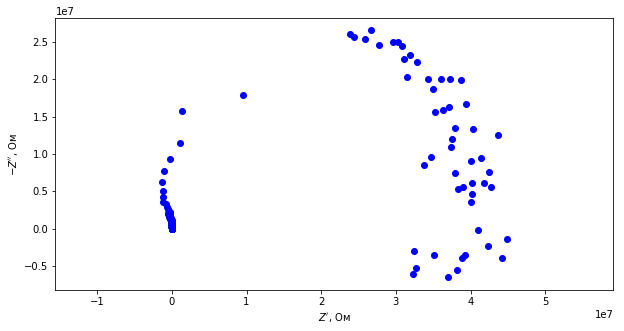

IndexError: index out of range

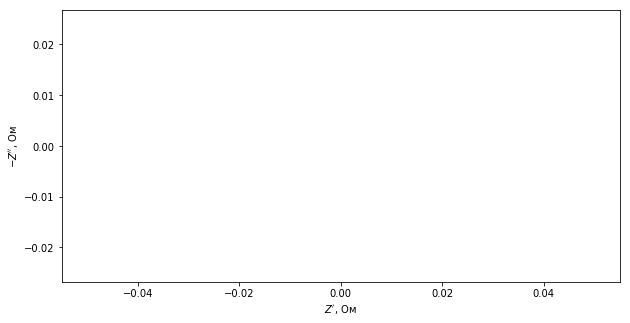

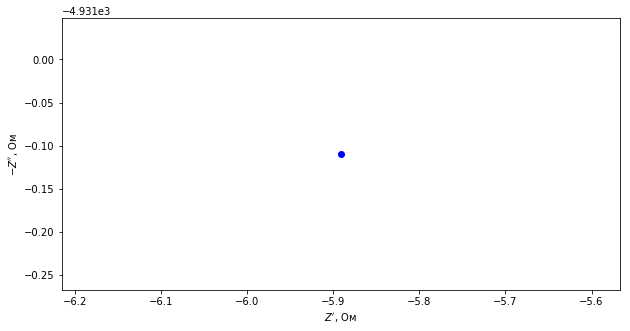

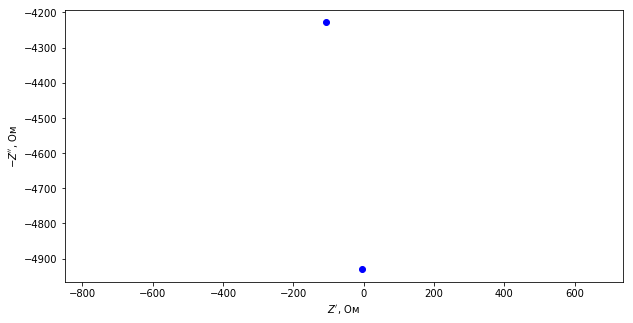

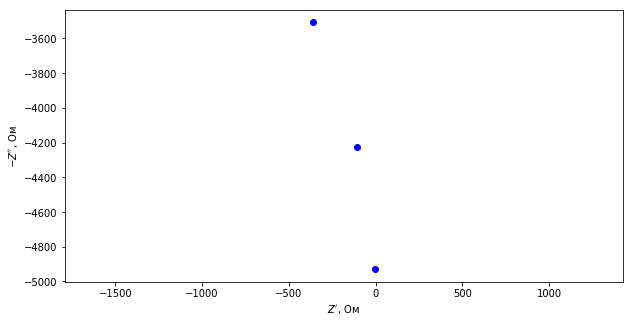

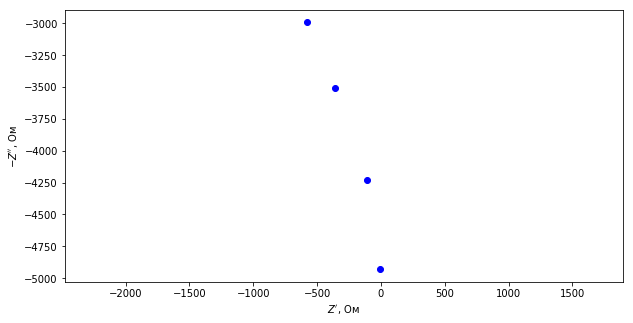

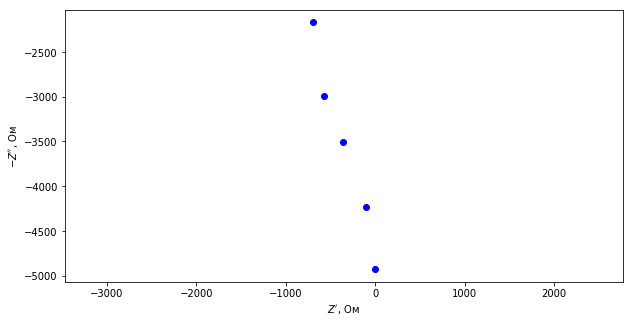

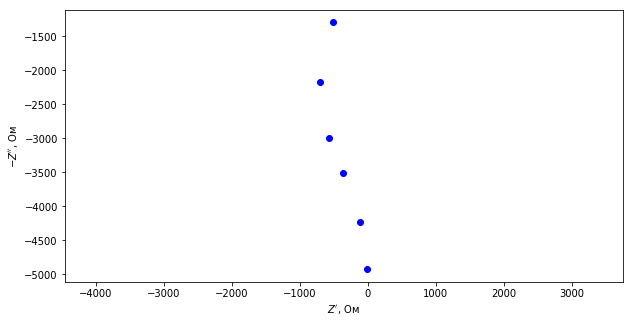

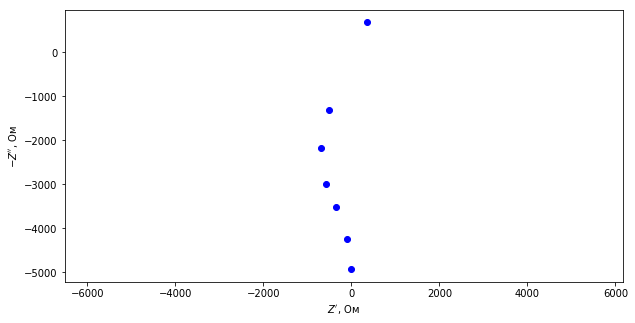

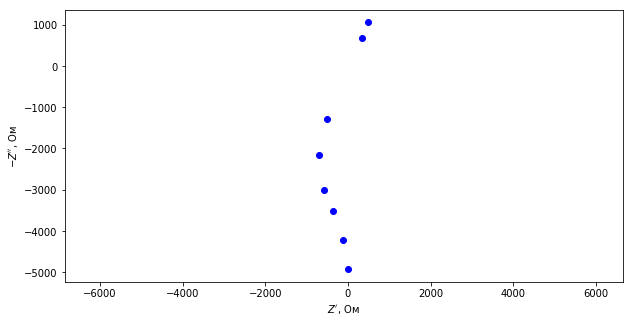

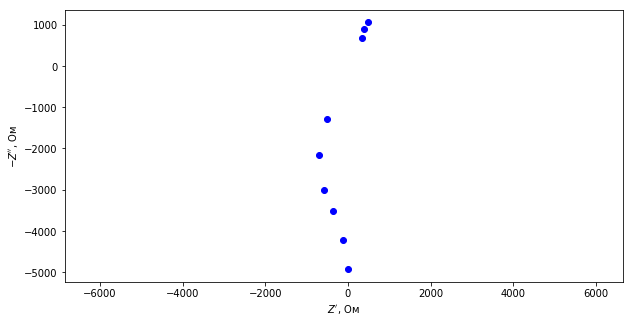

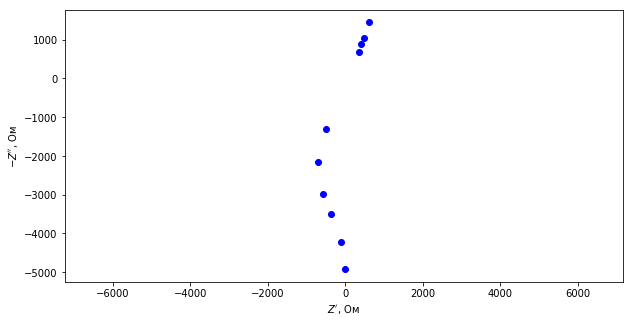

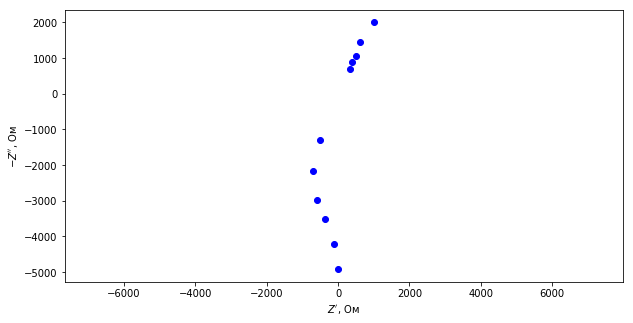

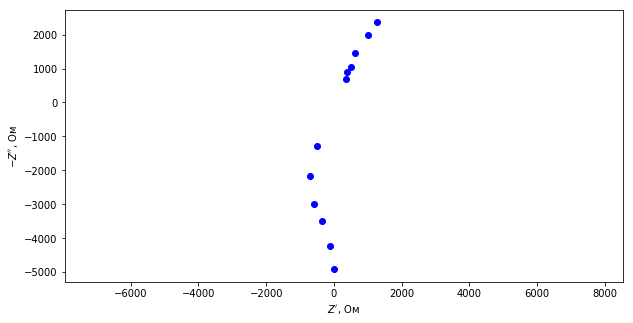

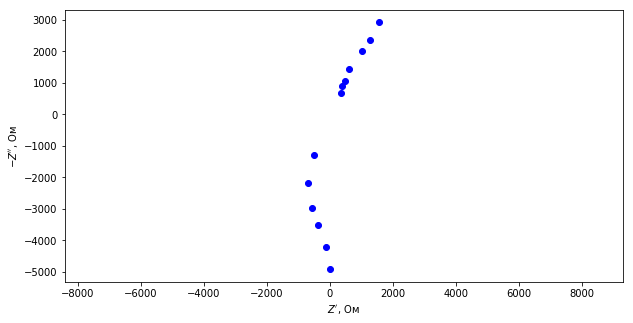

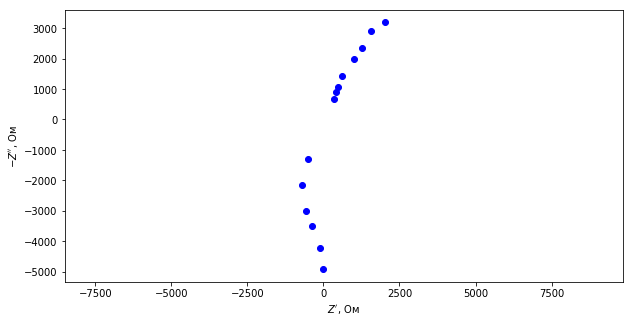

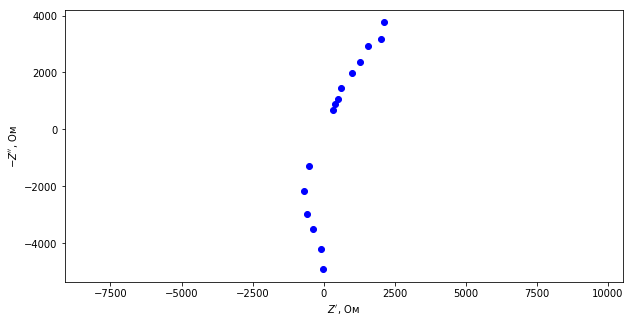

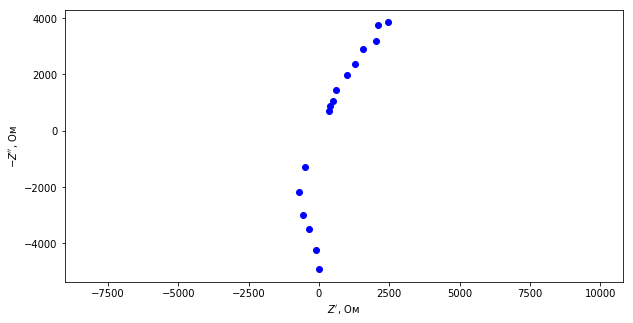

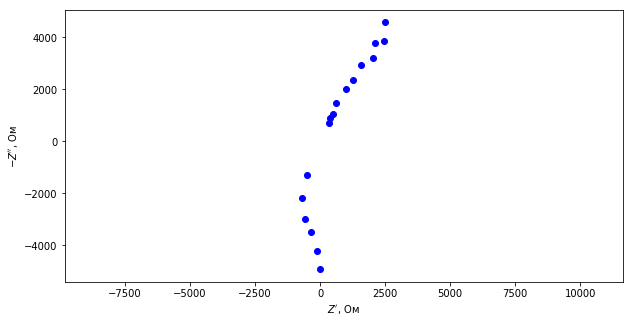

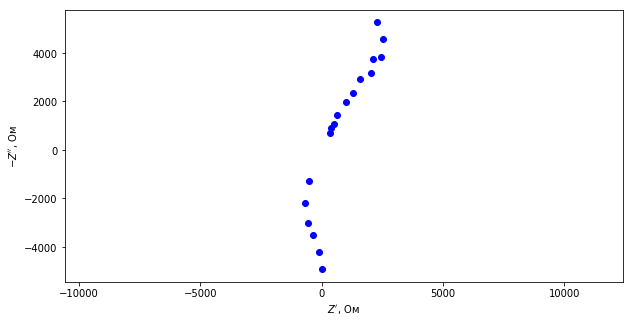

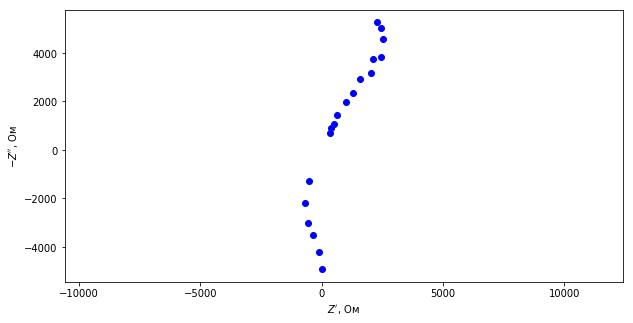

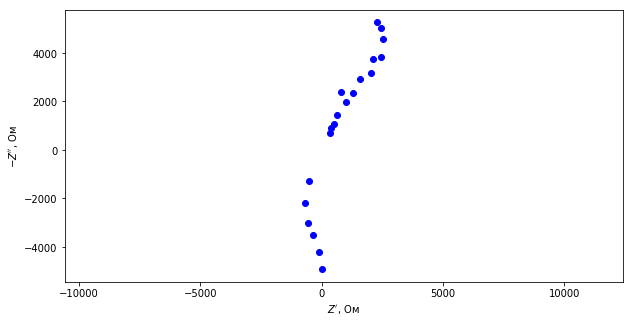

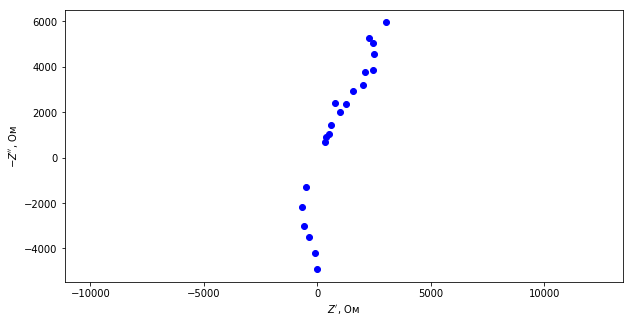

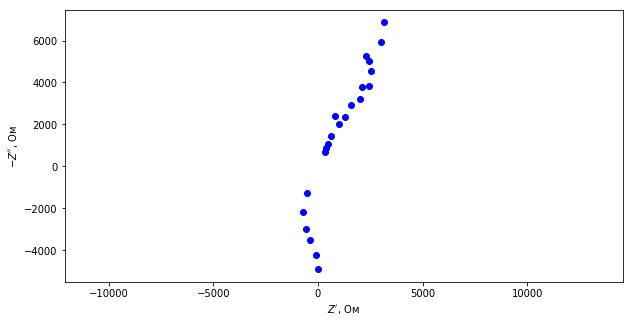

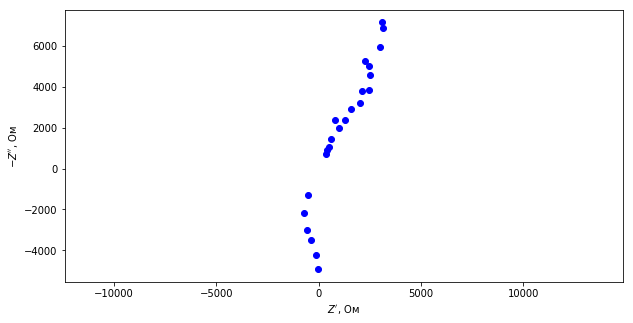

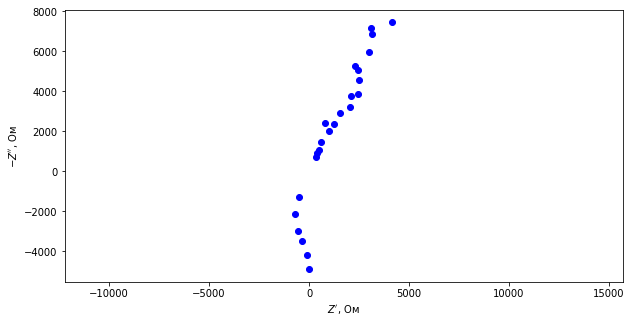

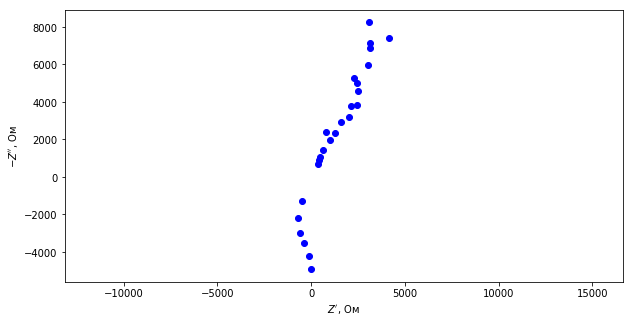

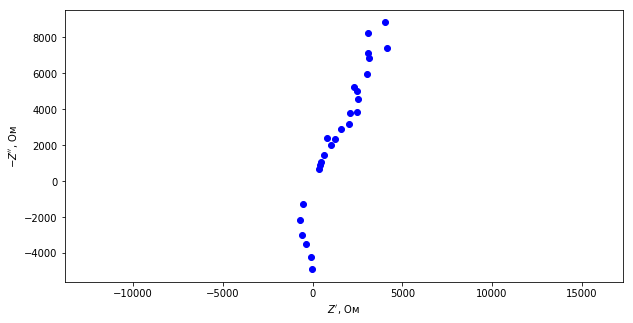

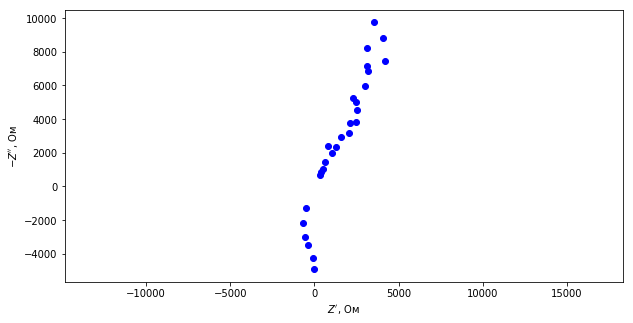

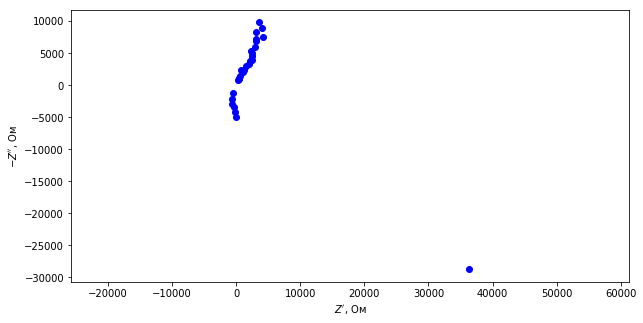

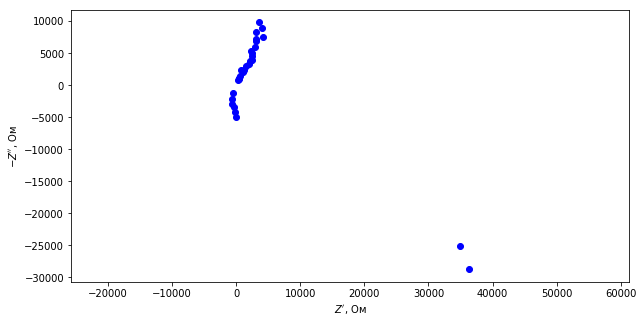

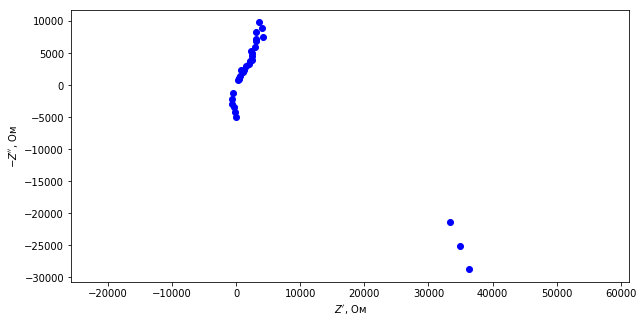

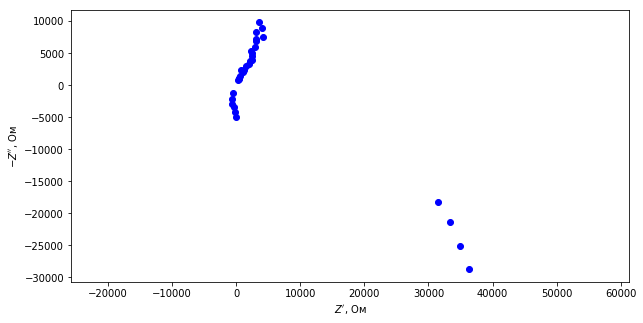

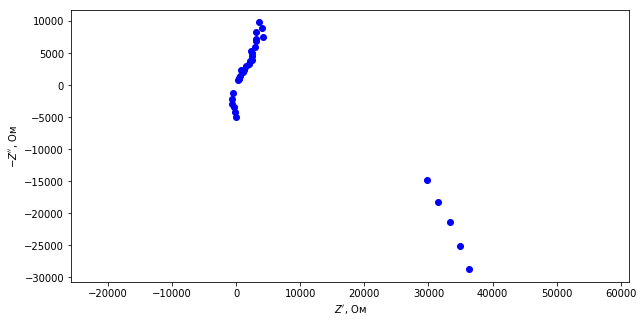

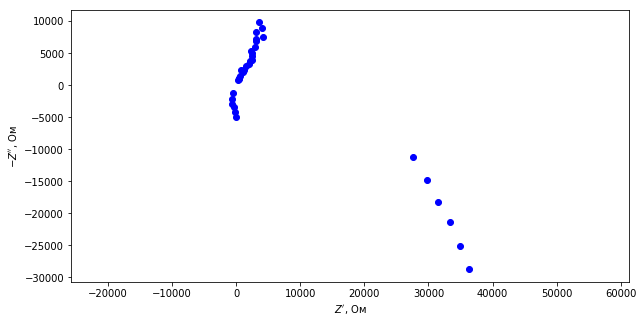

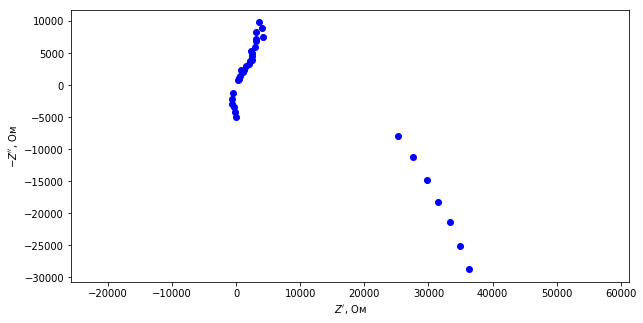

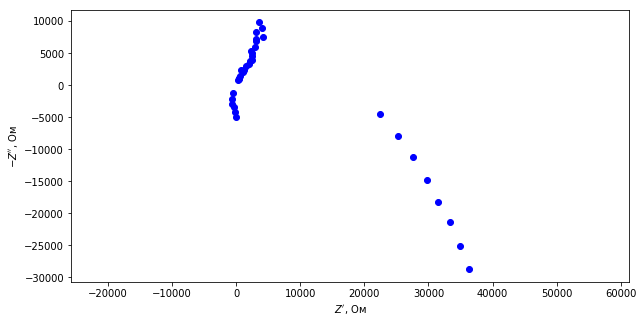

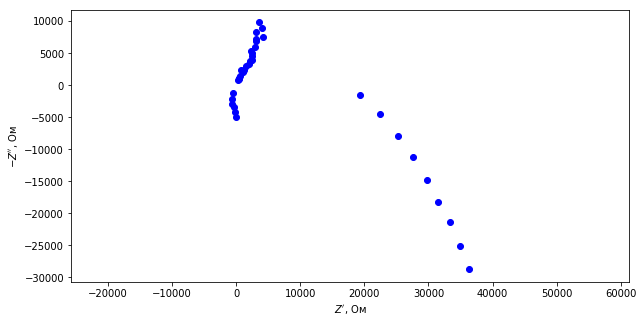

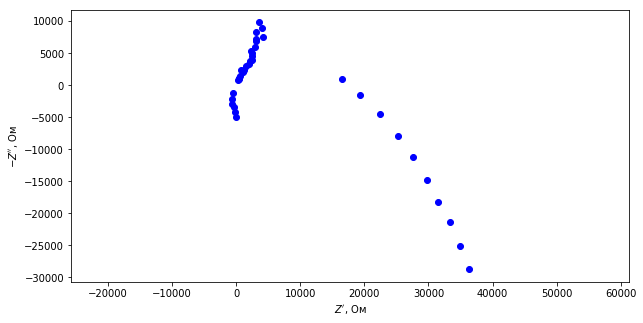

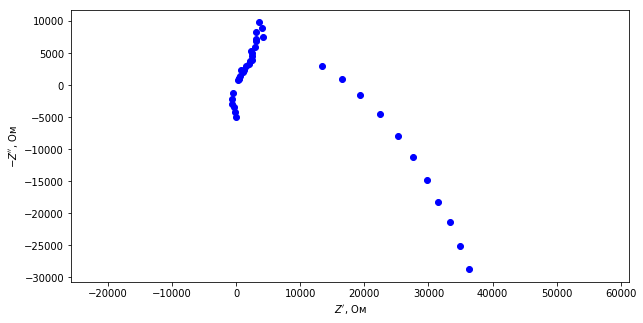

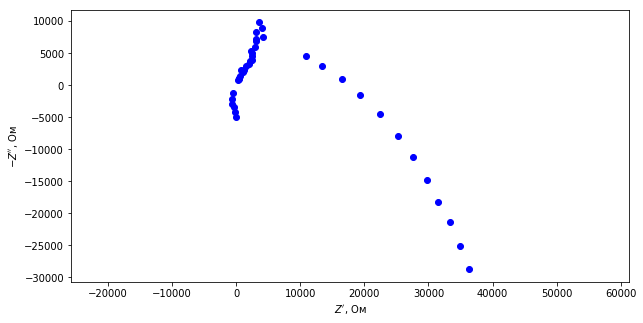

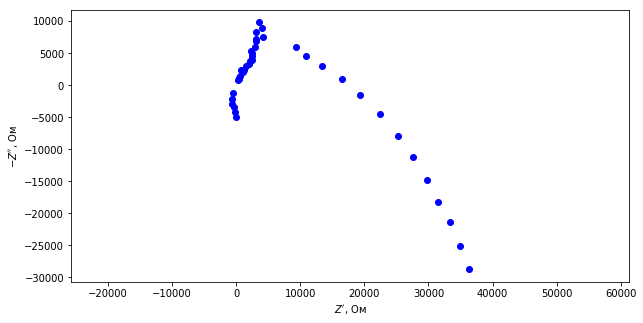

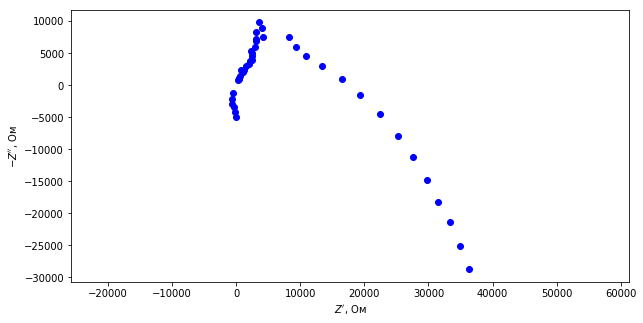

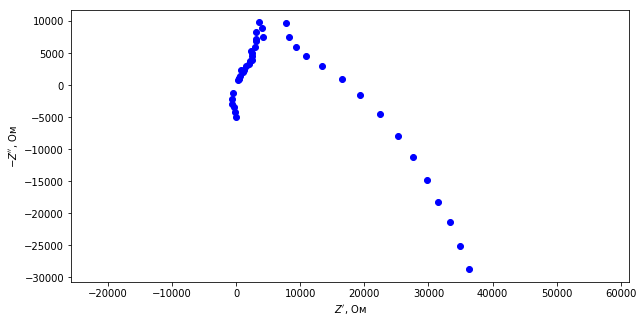

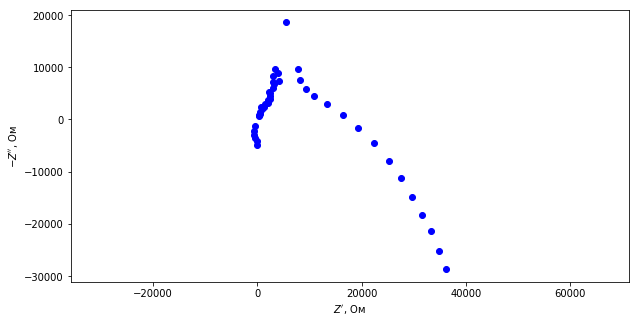

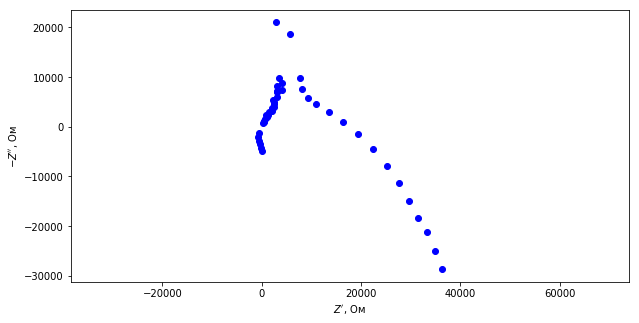

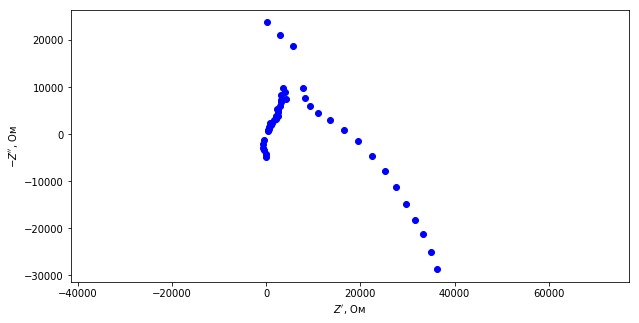

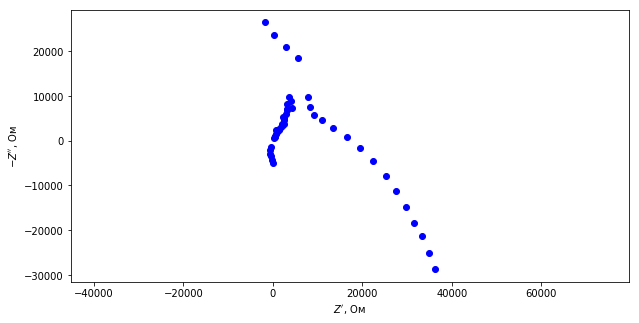

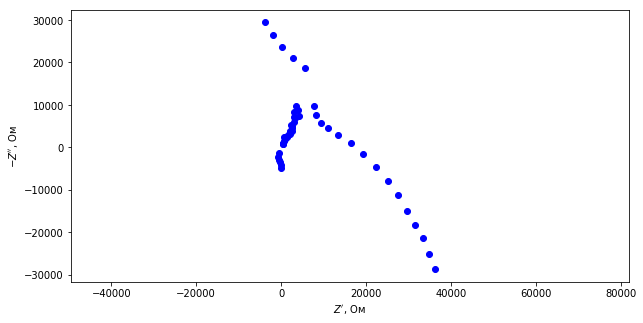

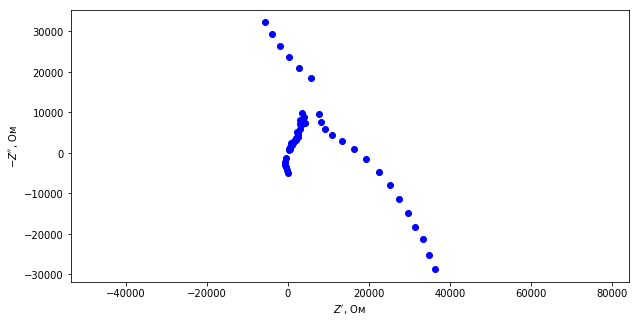

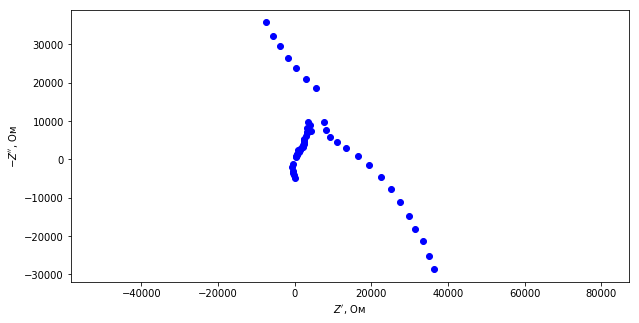

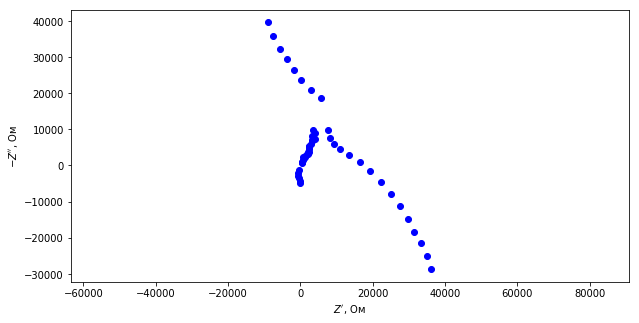

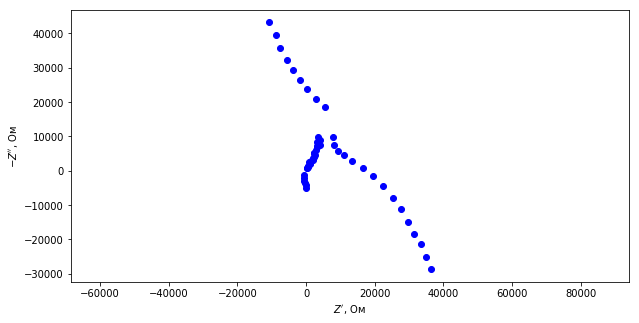

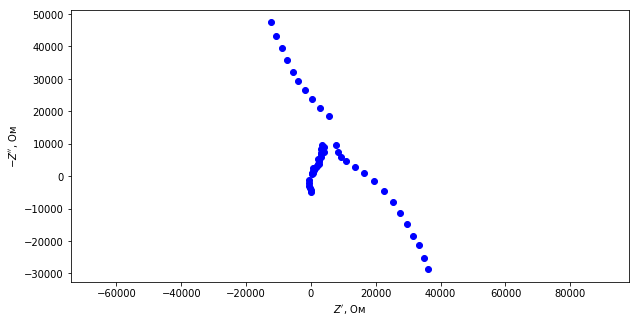

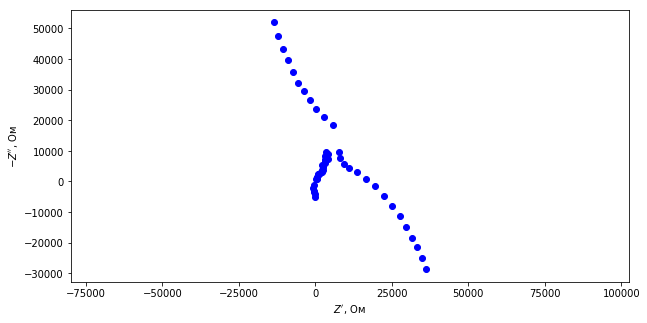

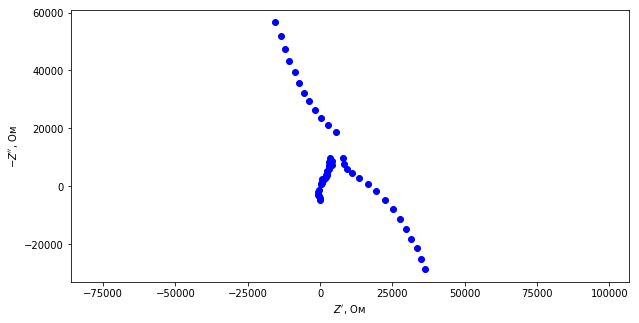

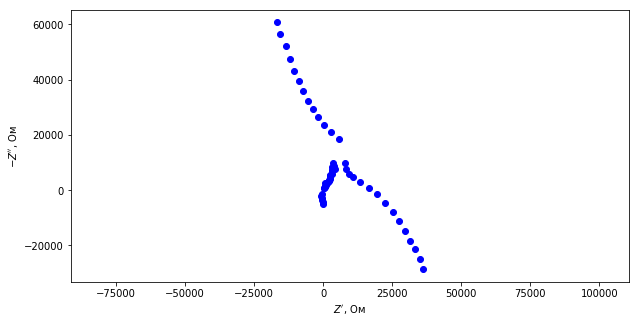

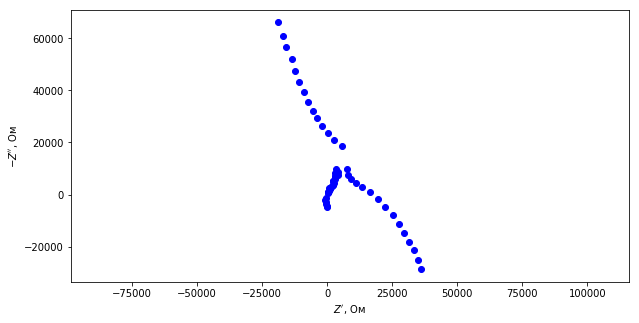

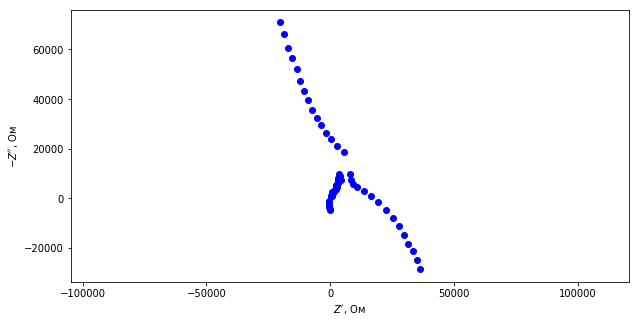

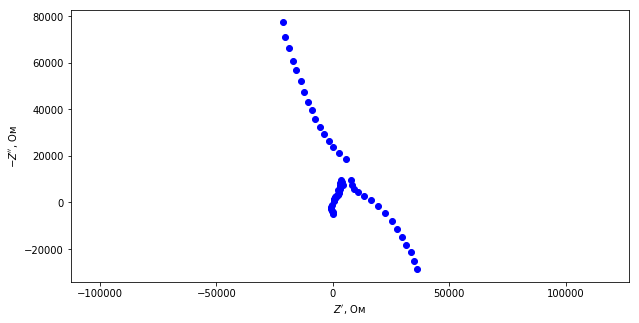

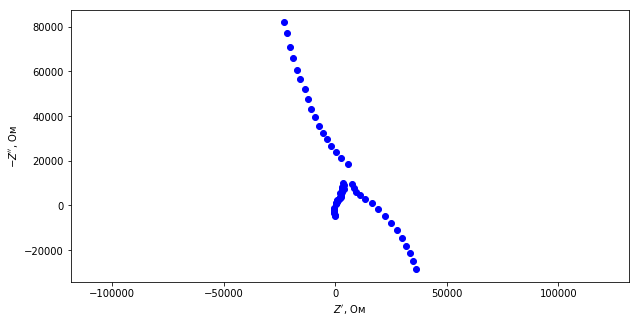

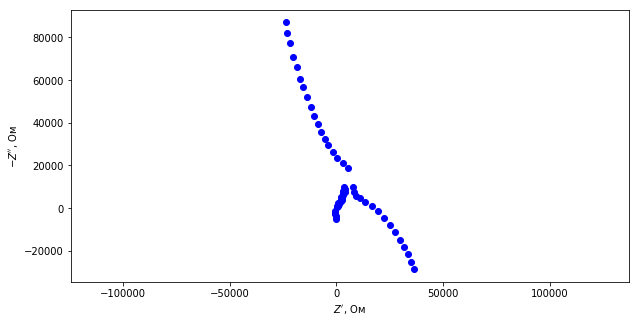

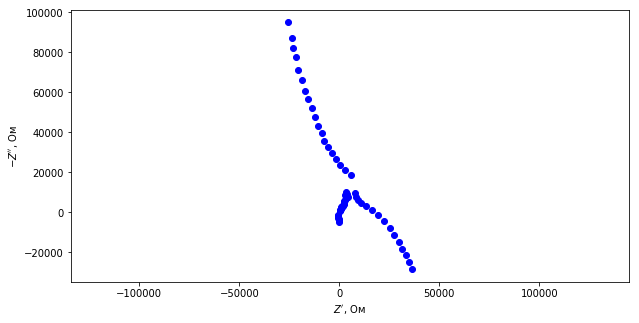

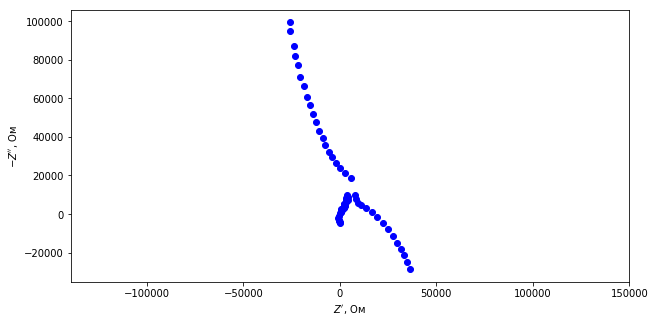

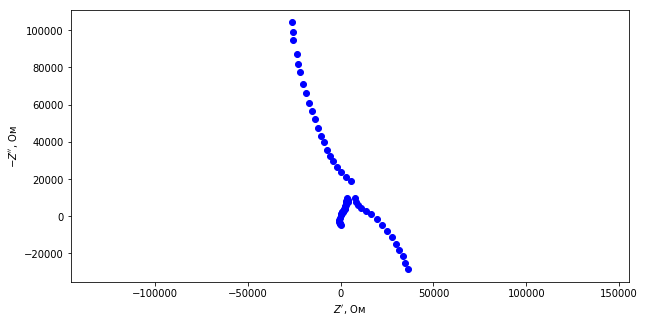

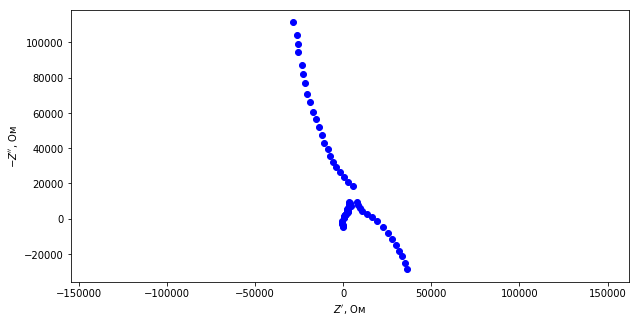

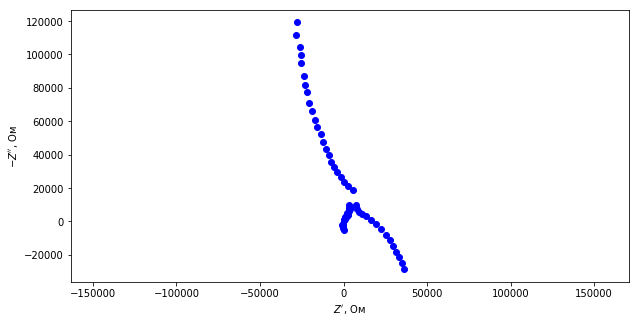

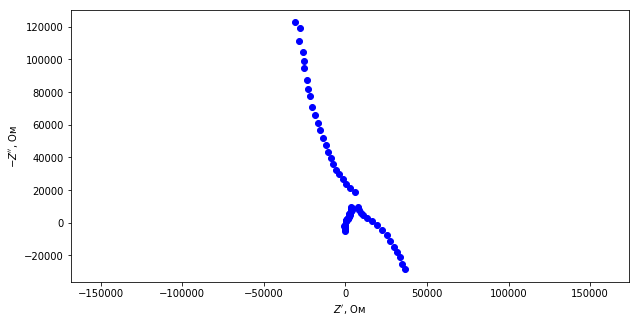

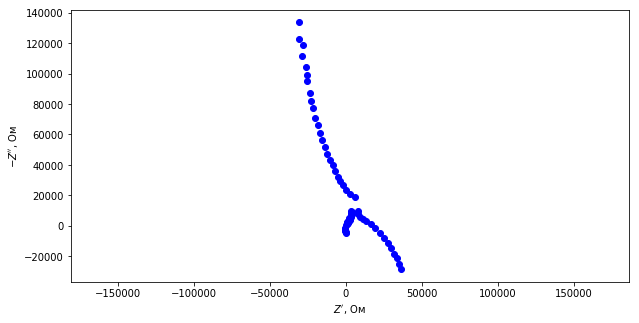

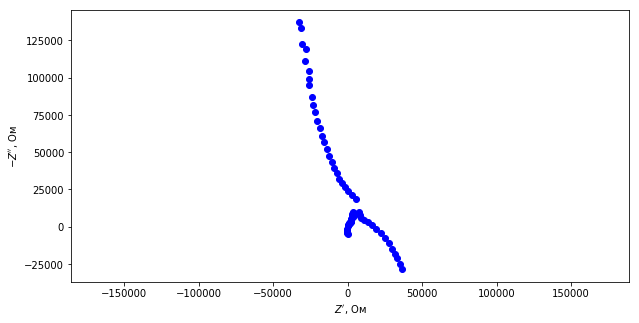

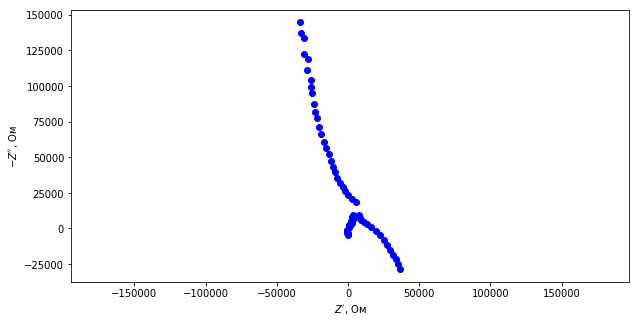

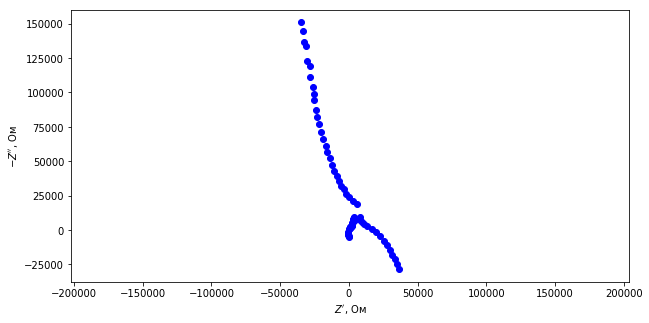

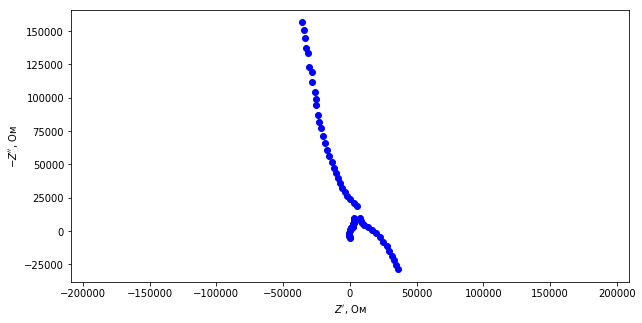

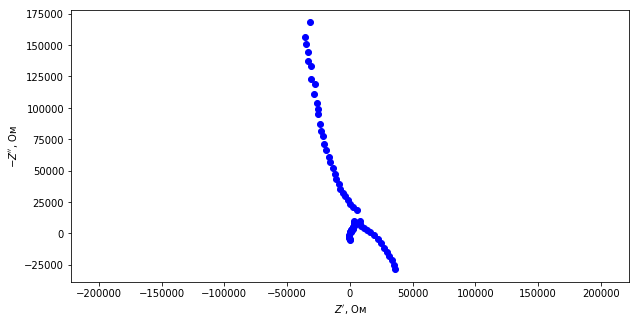

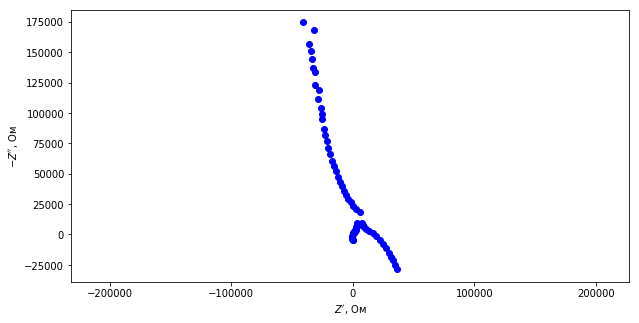

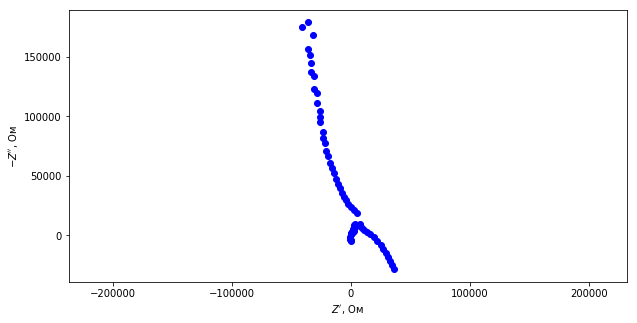

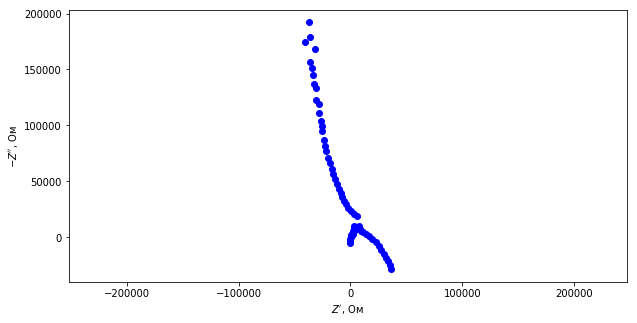

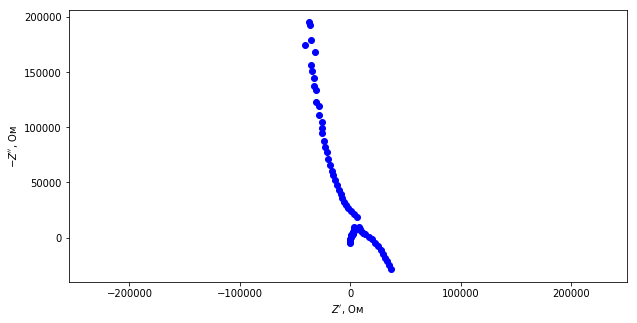

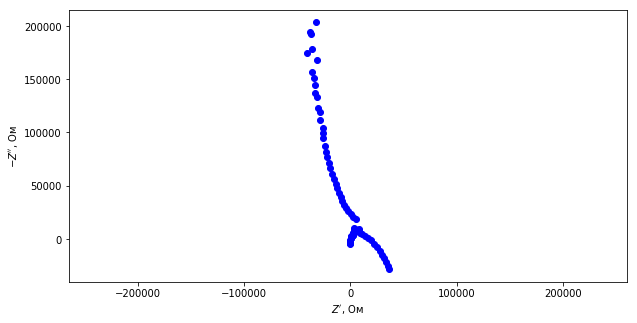

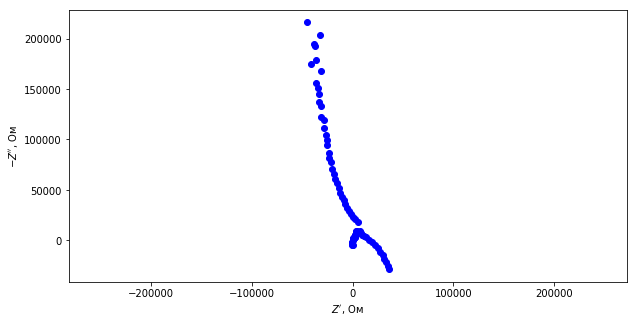

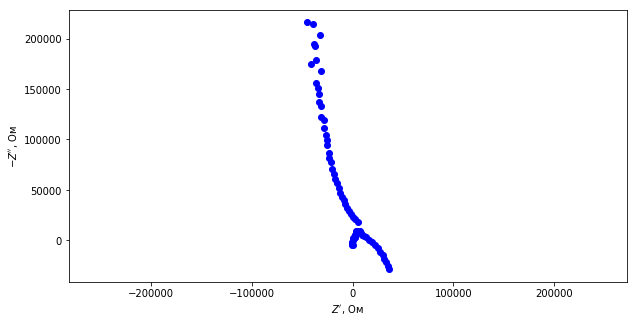

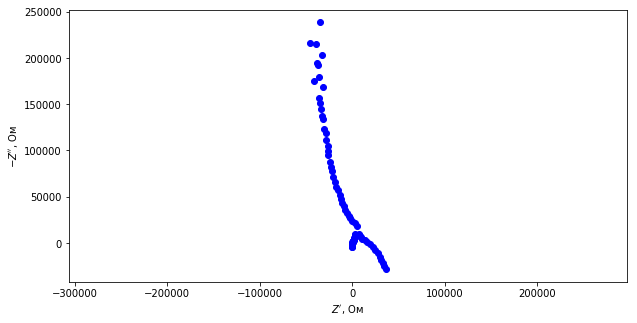

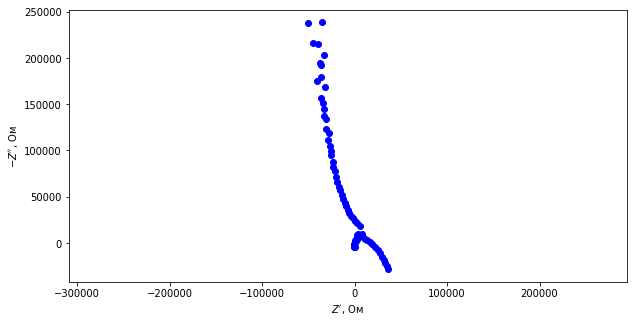

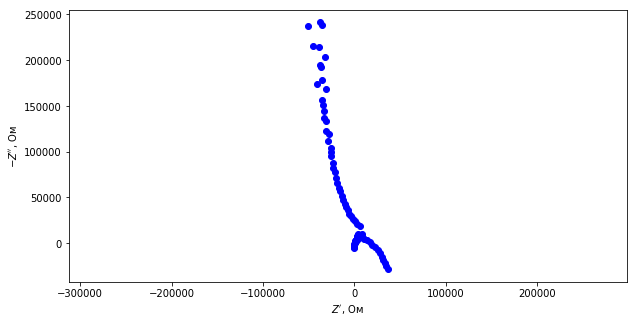

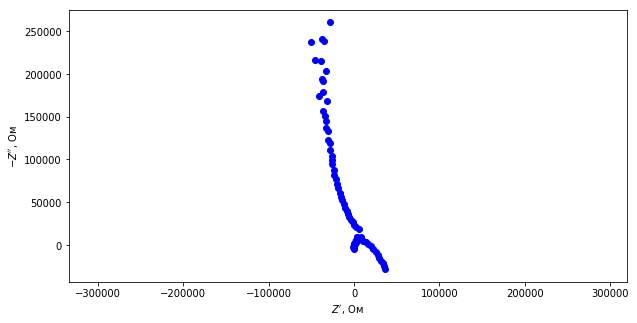

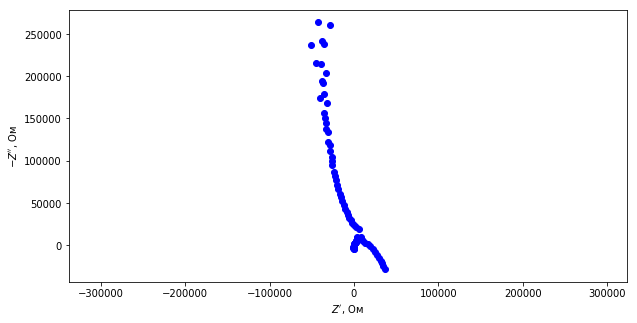

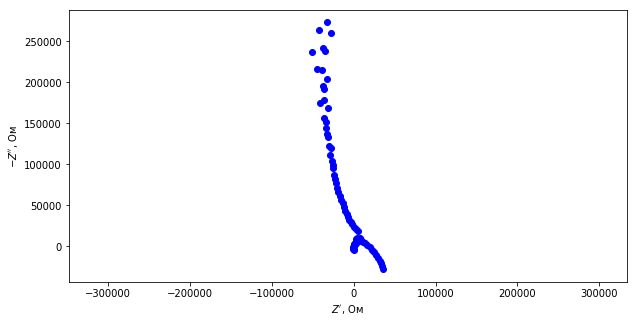

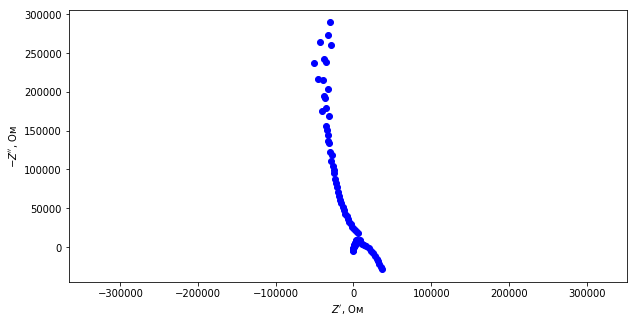

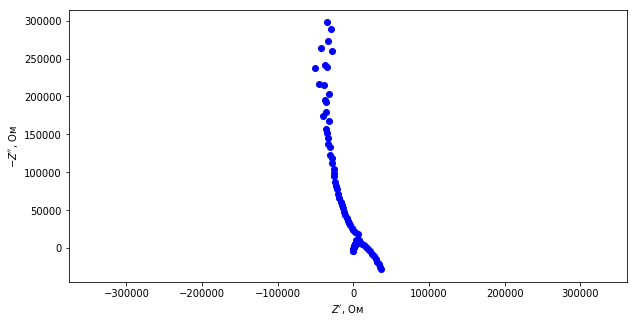

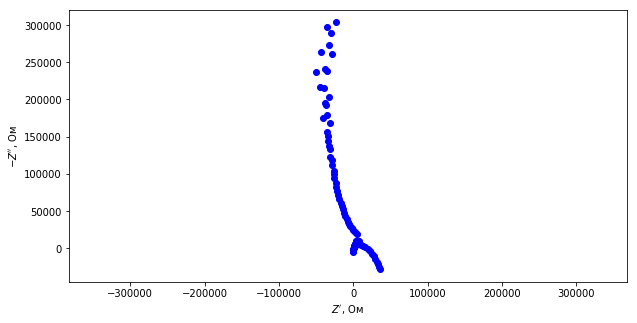

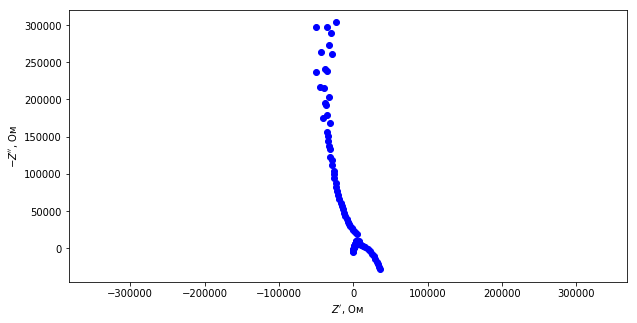

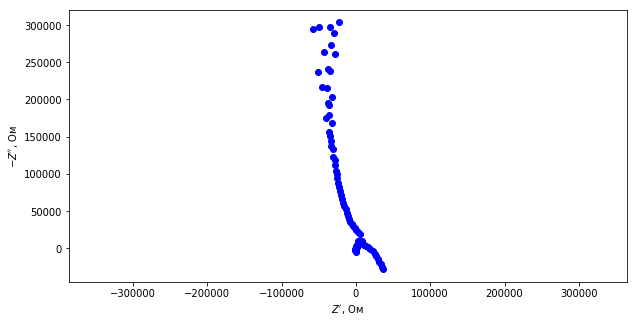

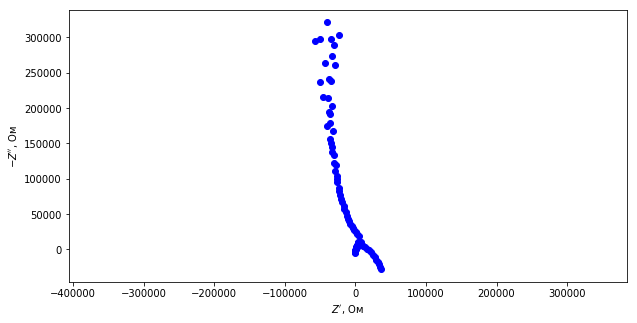

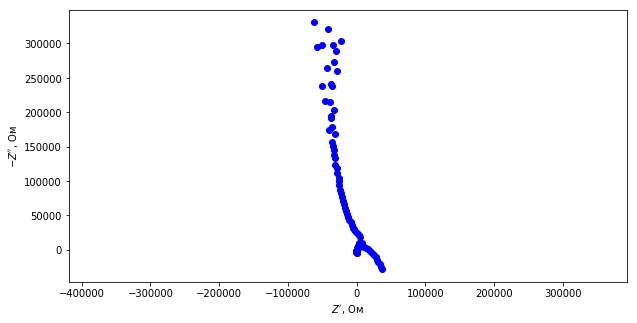

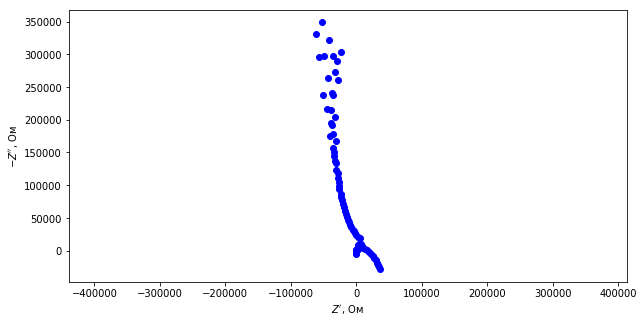

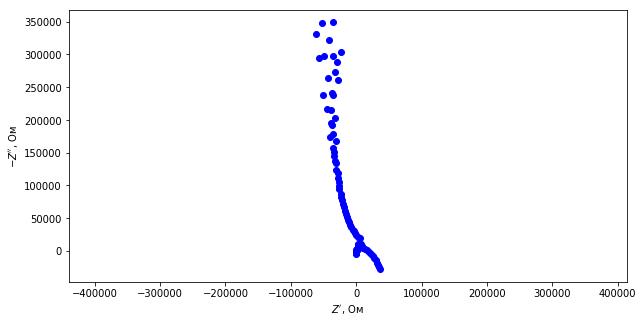

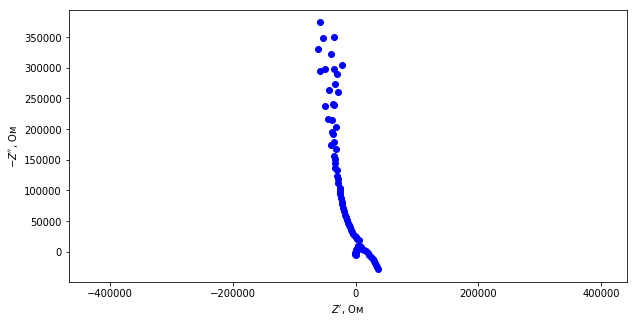

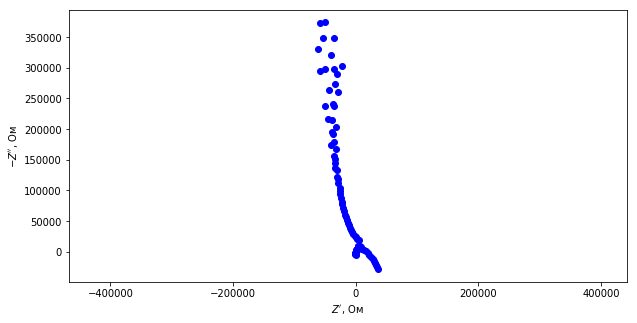

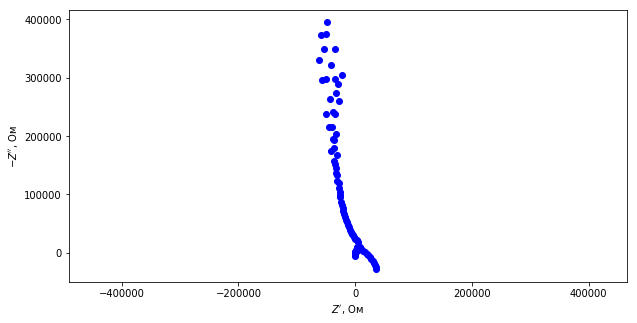

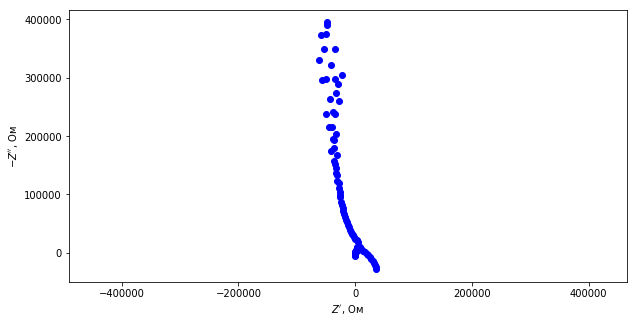

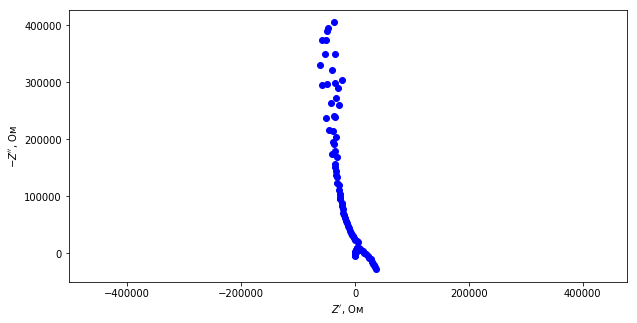

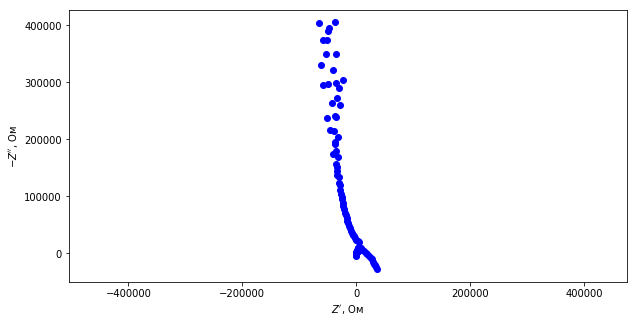

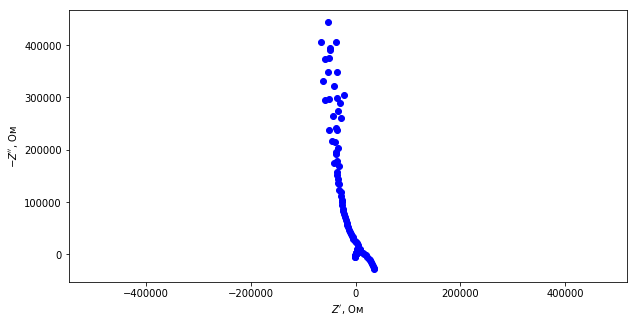

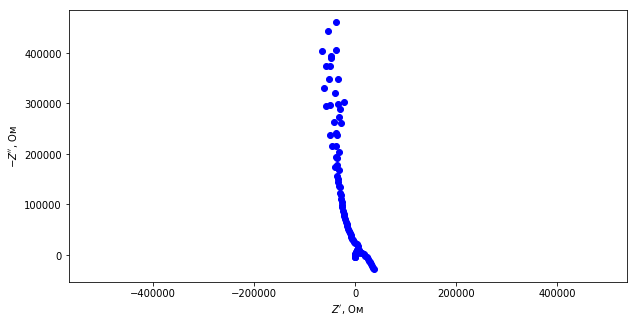

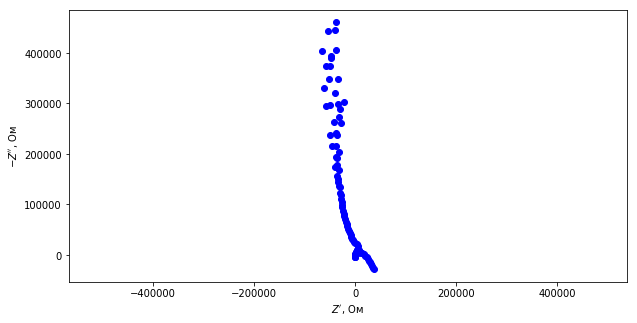

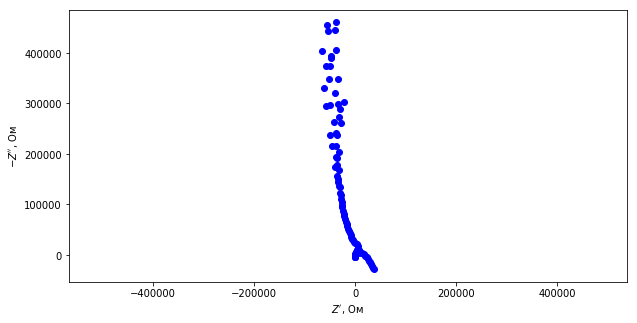

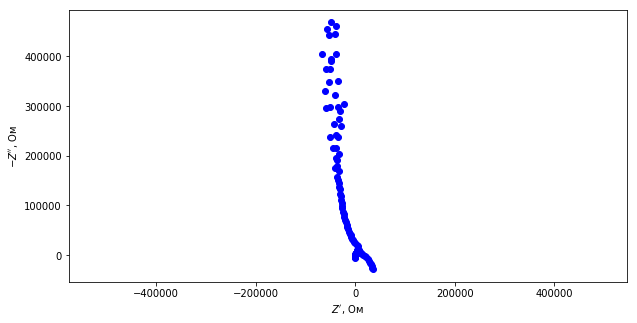

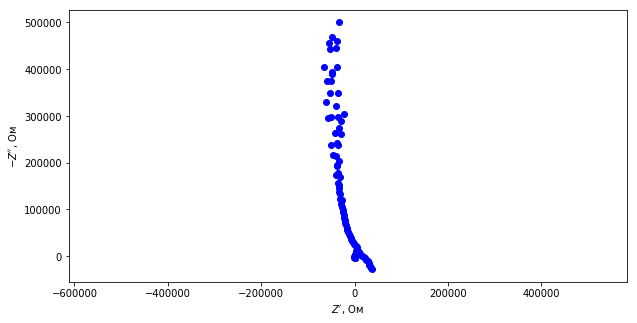

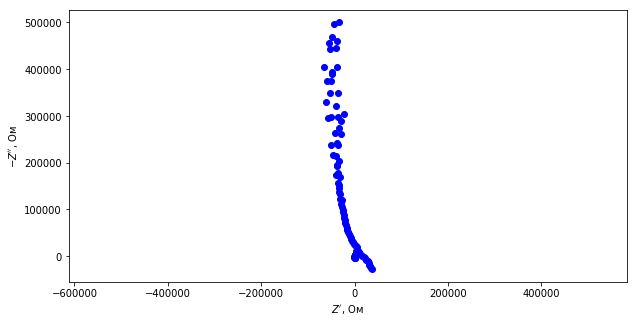

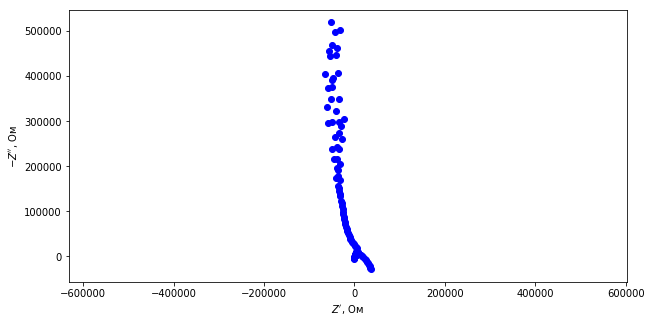

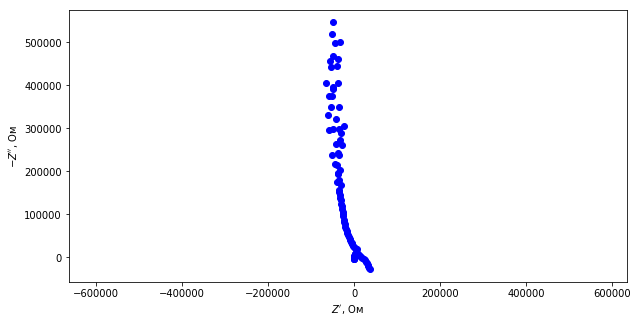

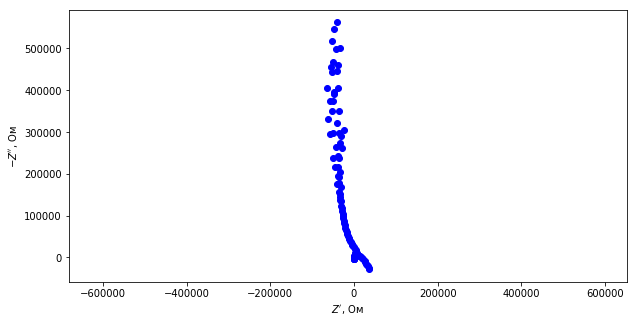

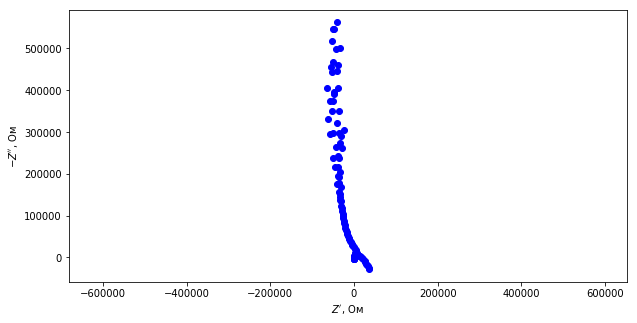

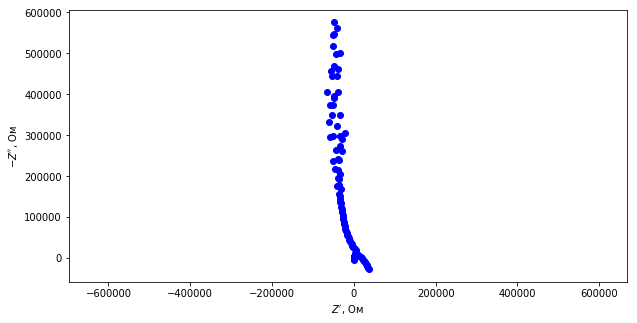

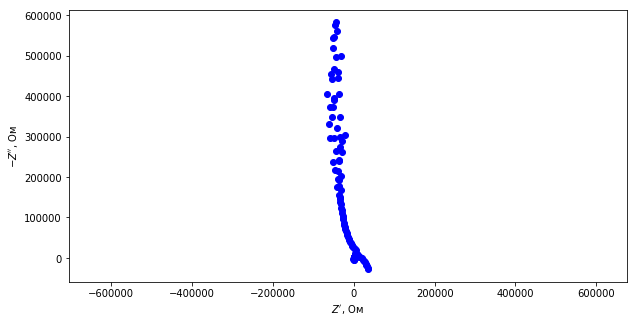

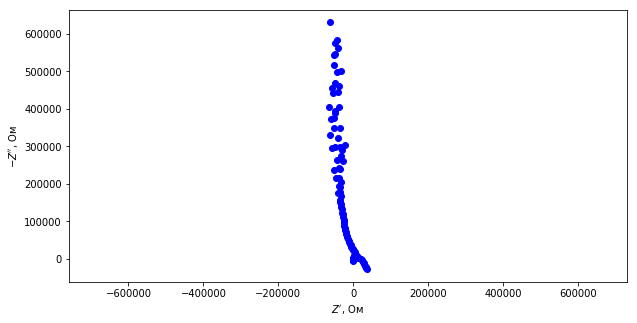

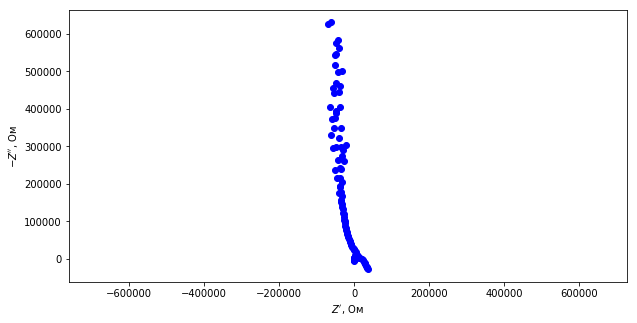

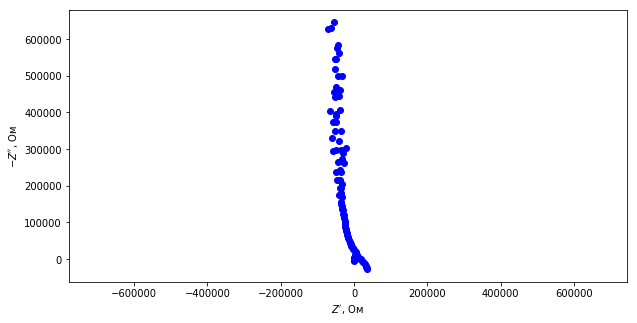

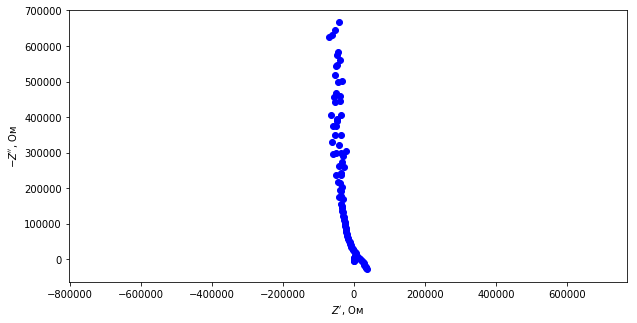

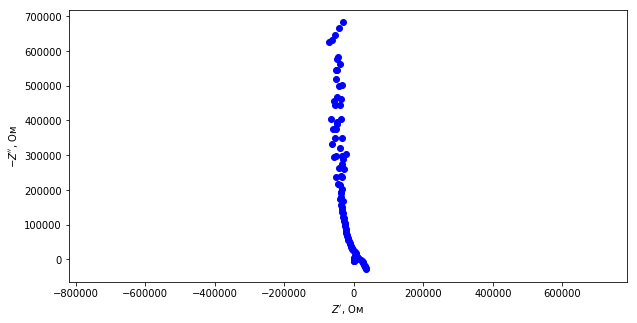

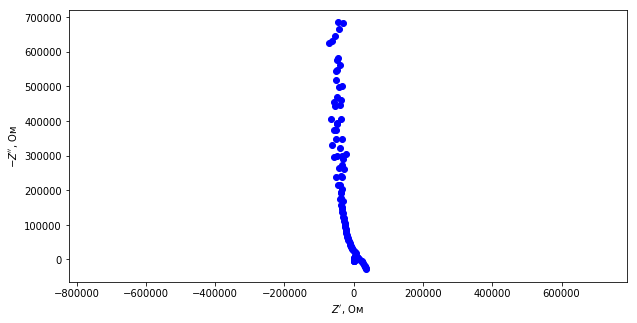

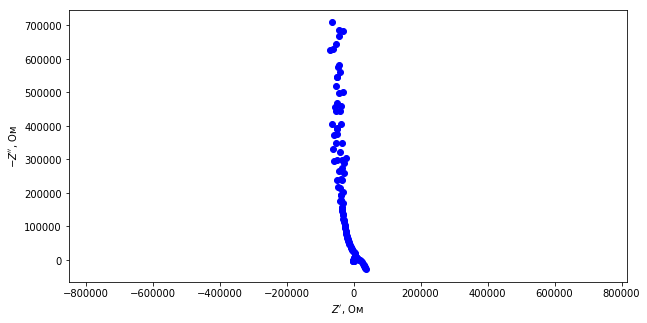

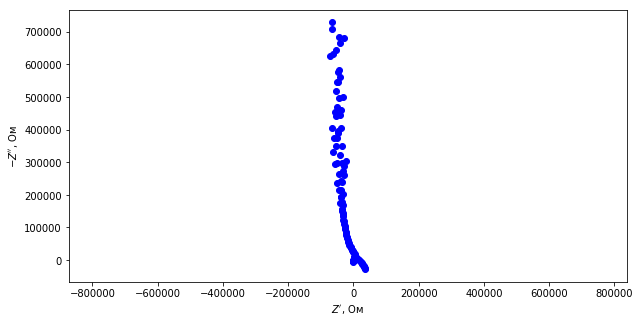

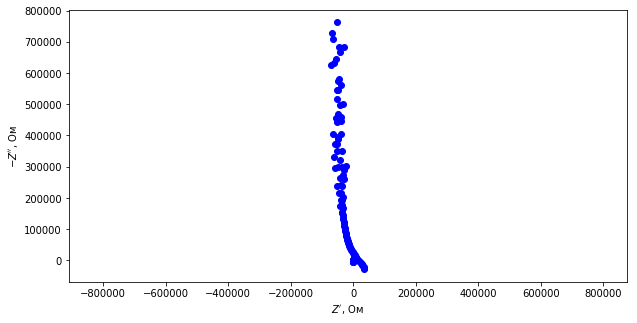

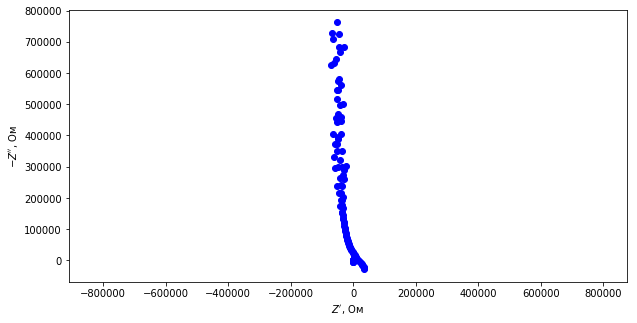

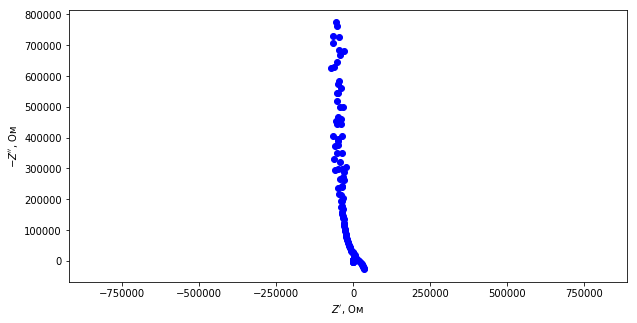

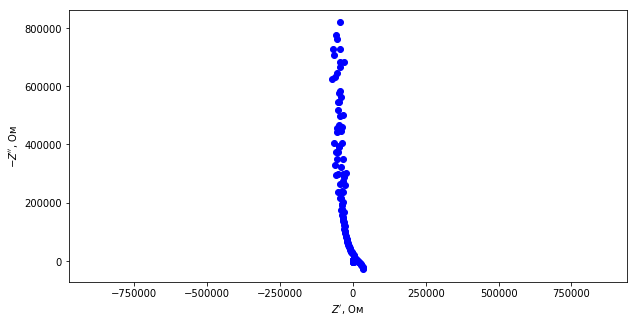

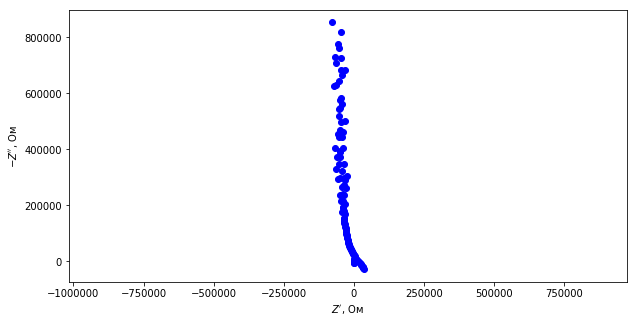

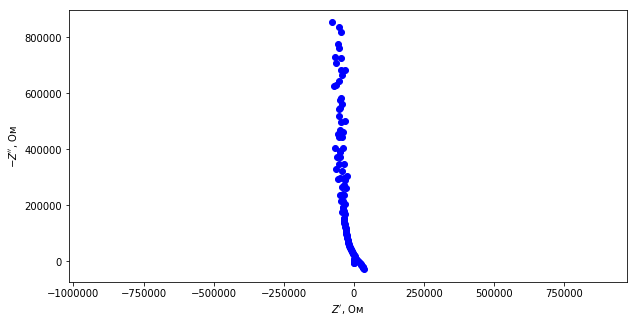

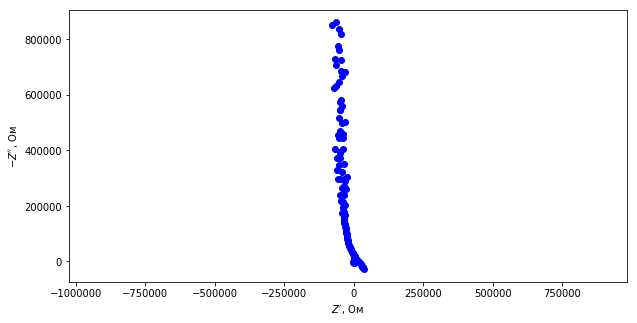

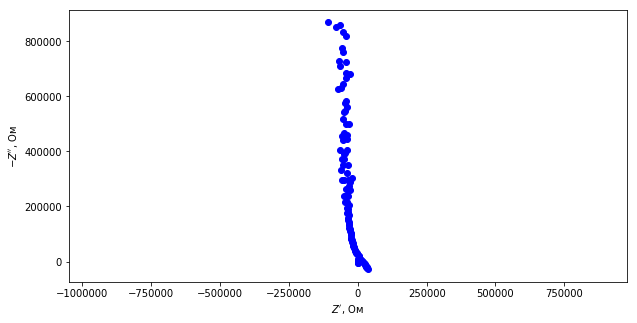

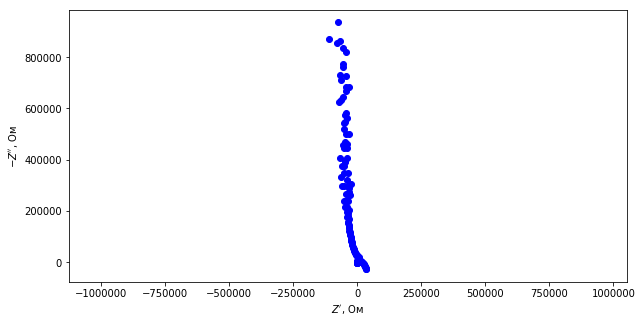

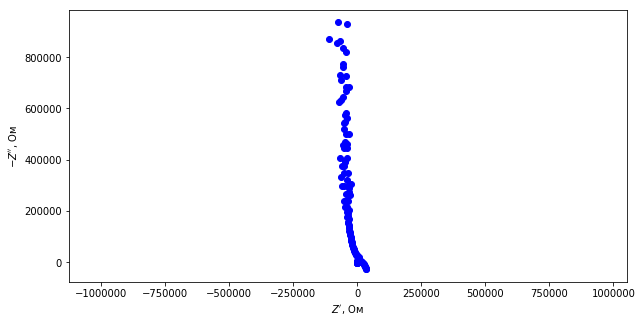

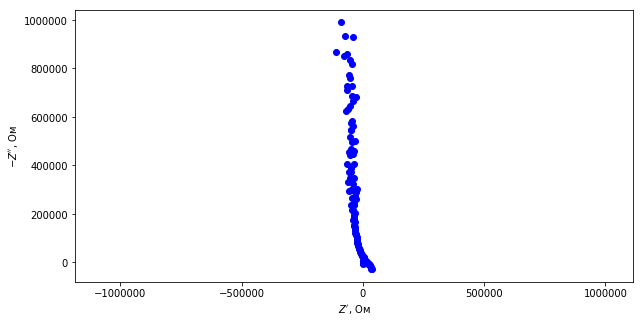

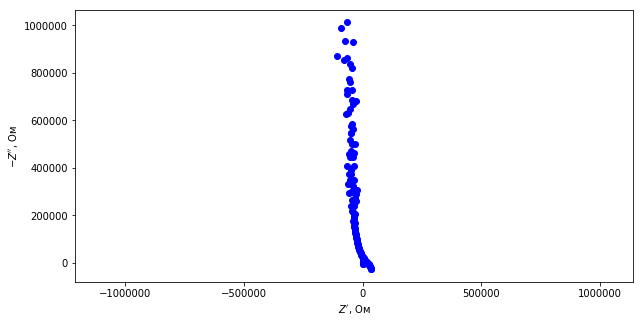

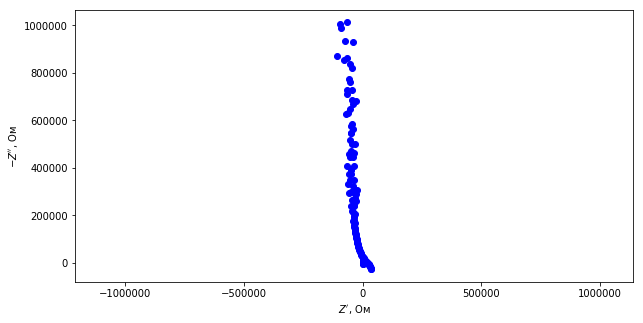

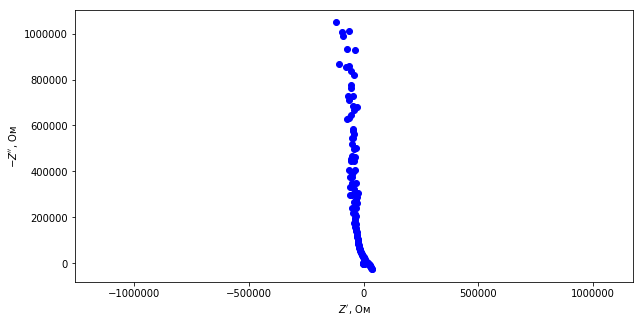

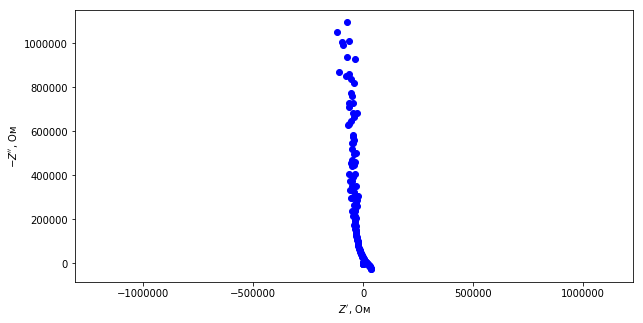

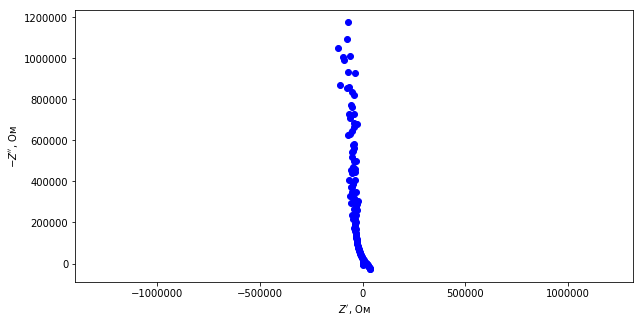

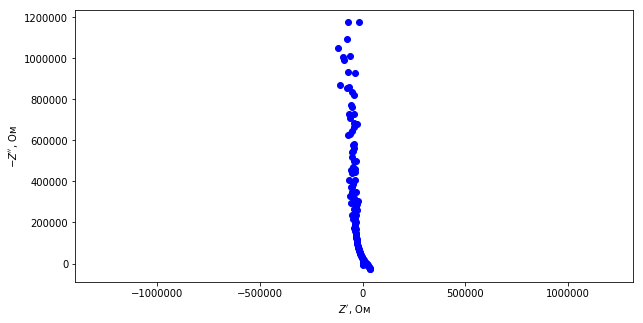

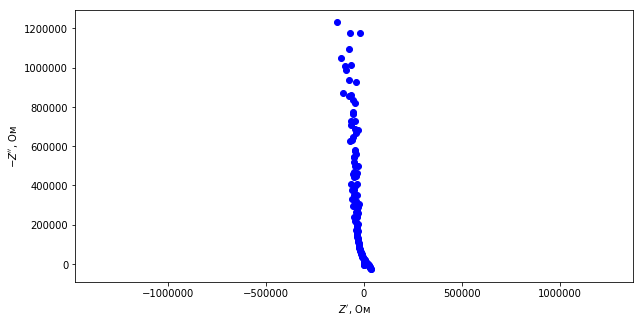

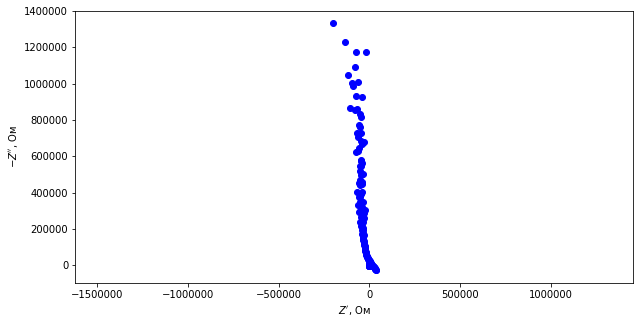

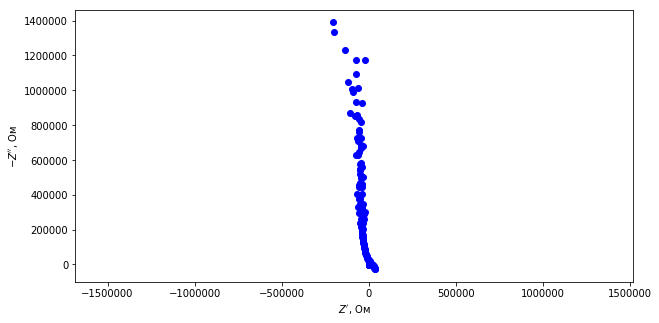

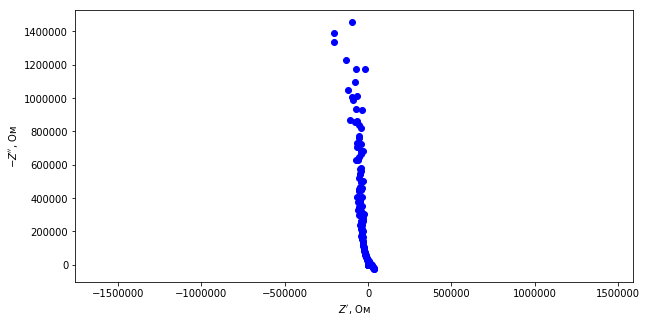

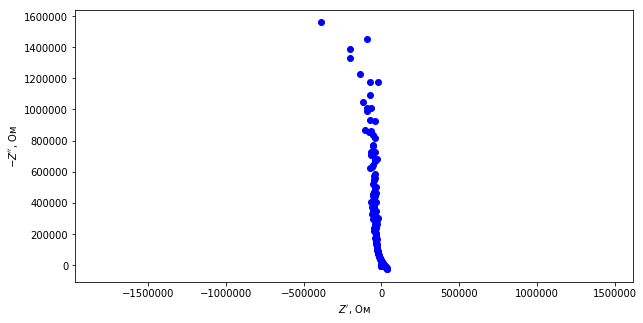

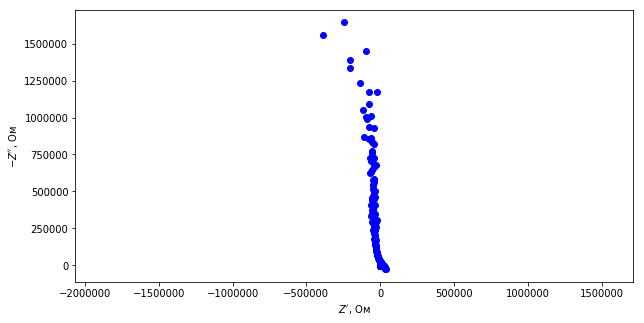

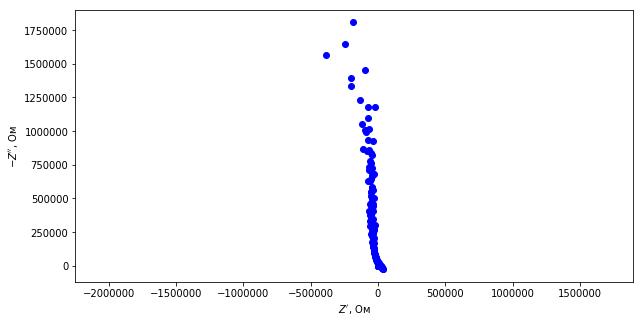

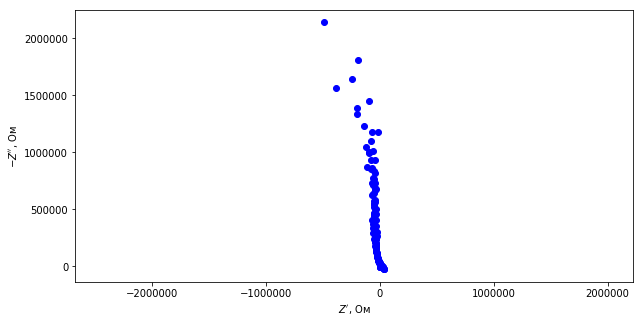

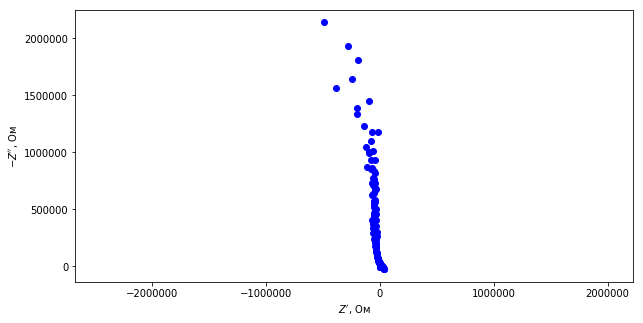

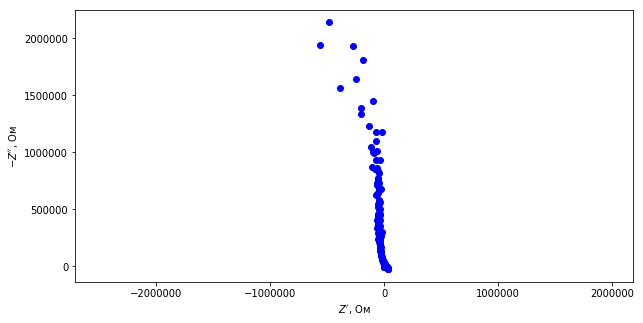

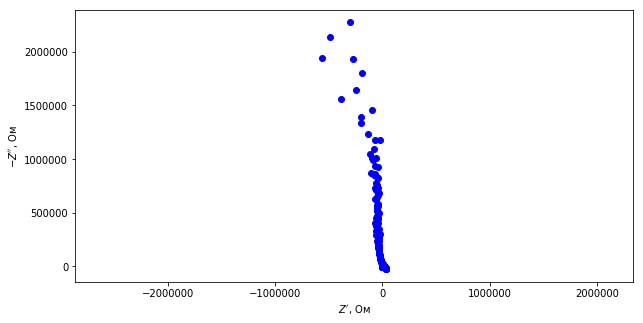

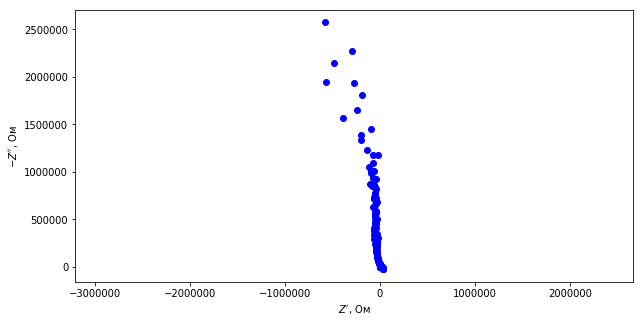

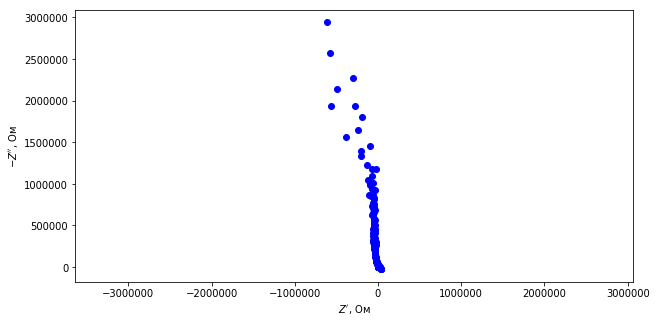

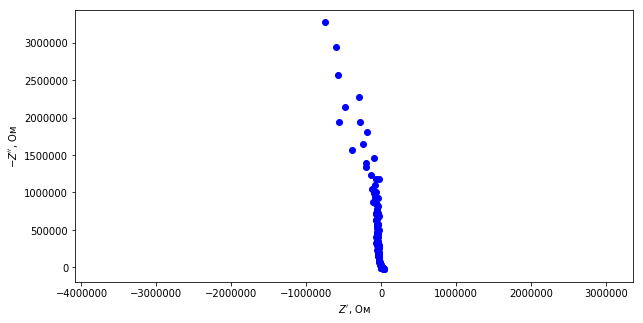

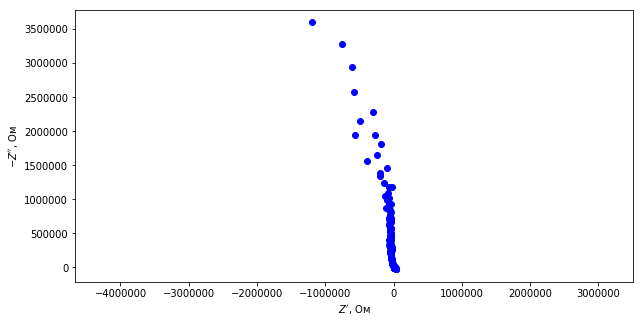

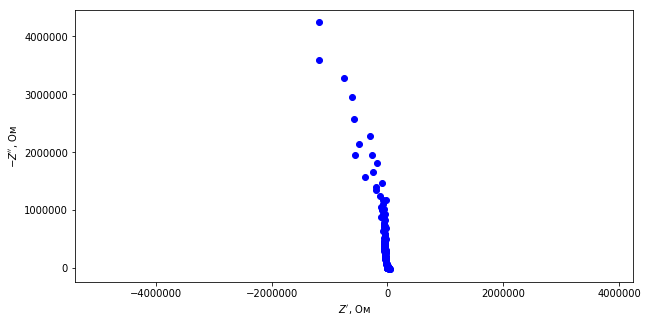

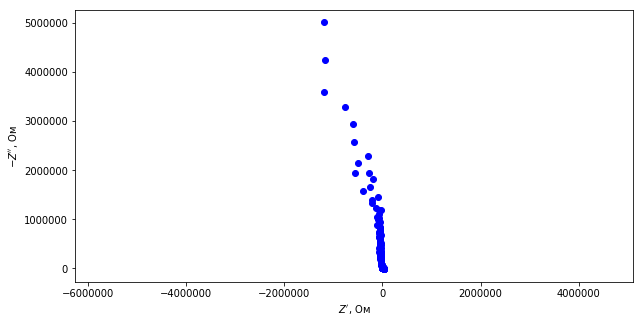

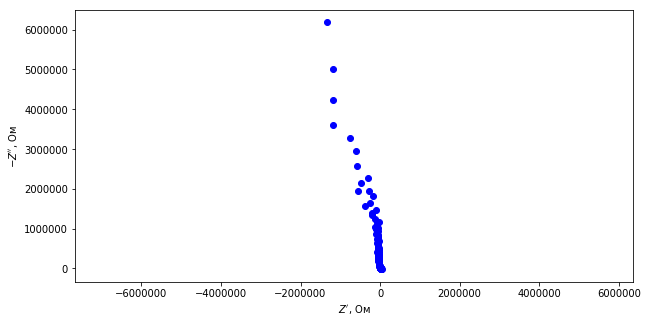

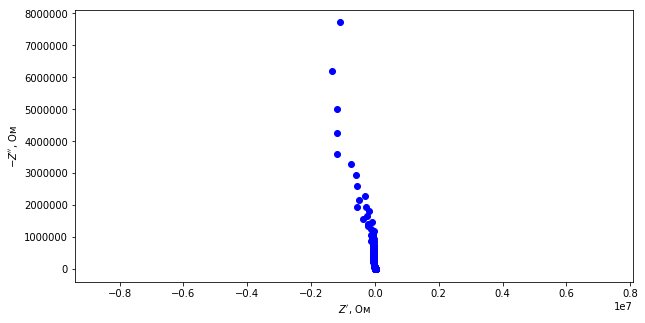

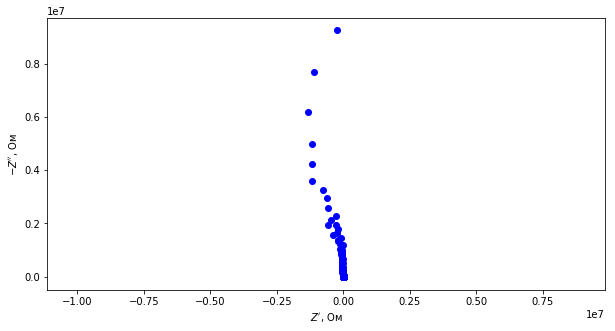

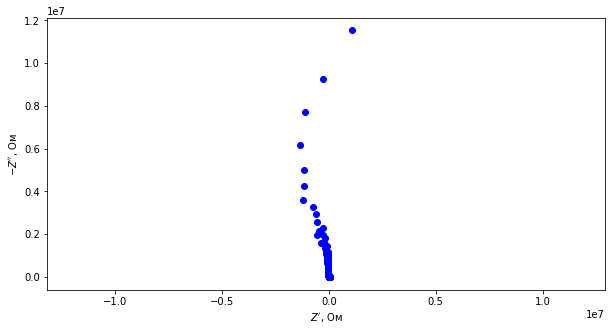

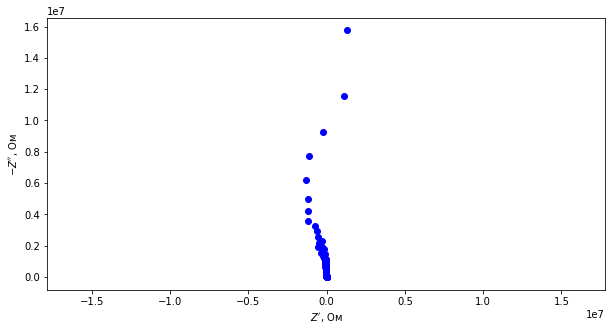

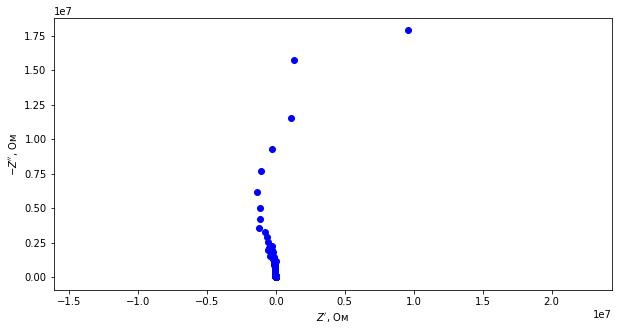

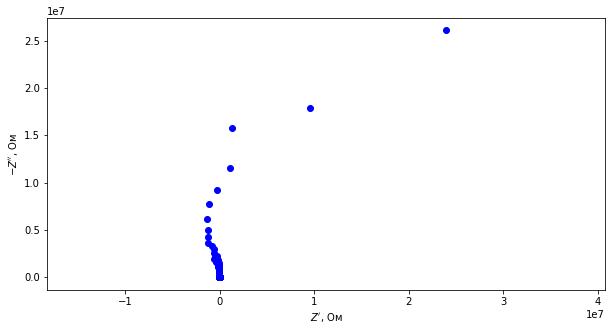

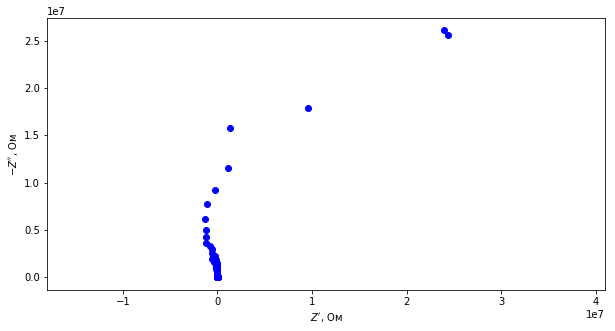

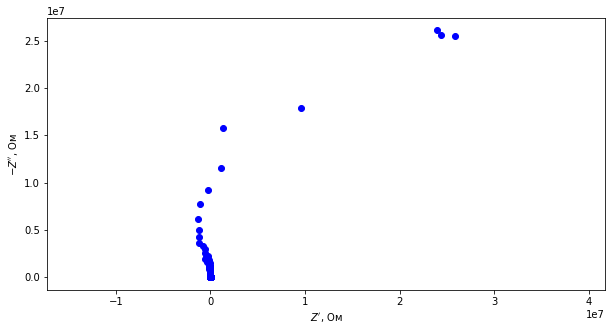

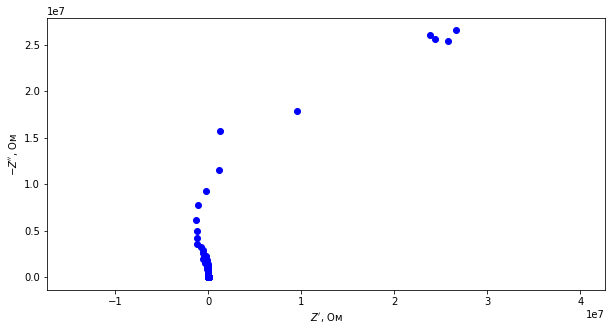

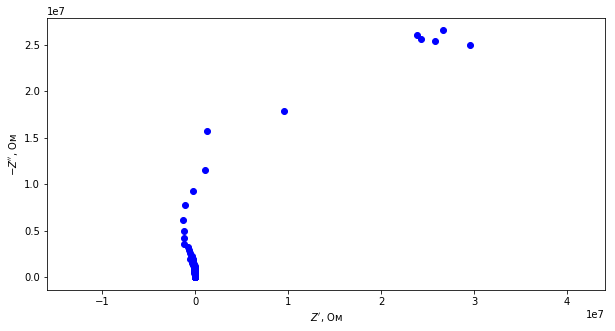

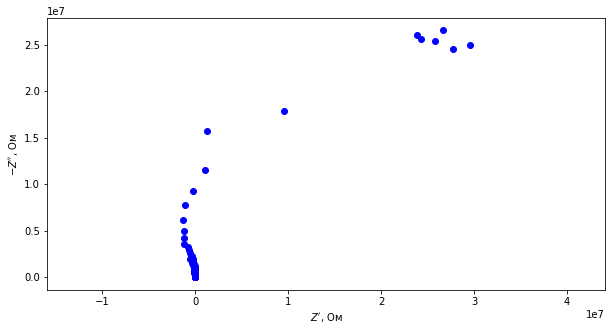

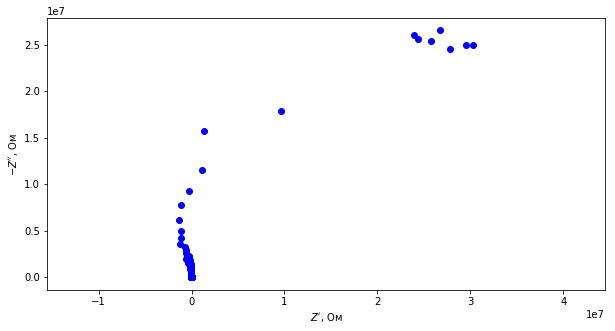

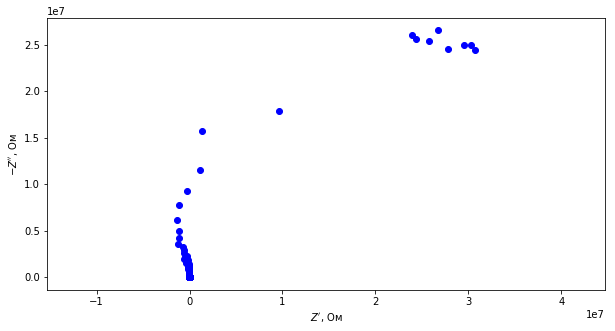

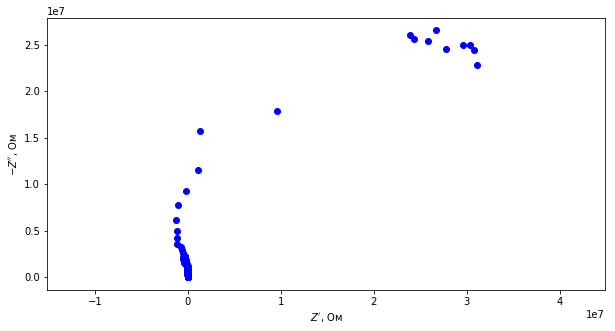

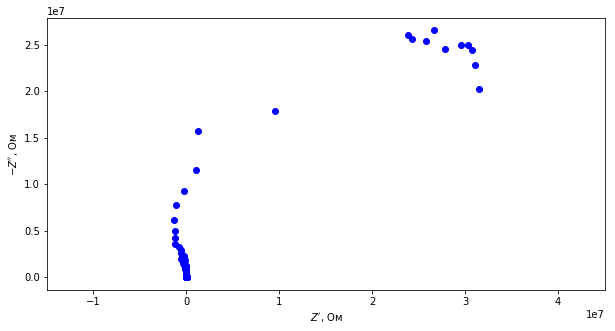

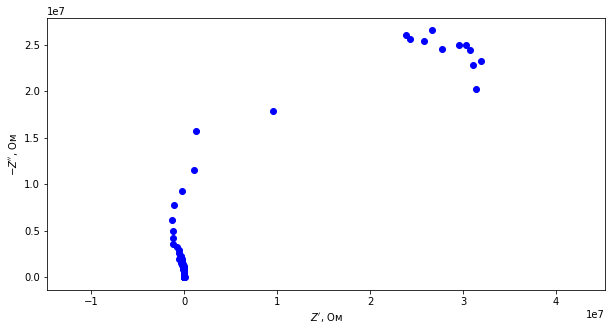

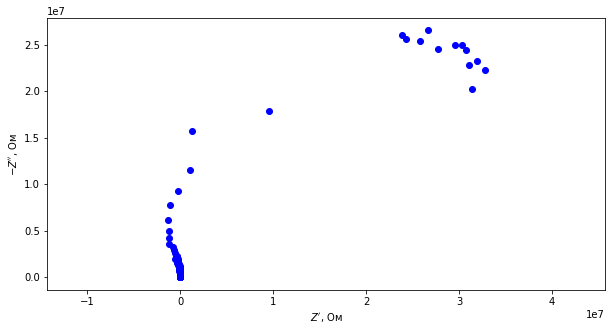

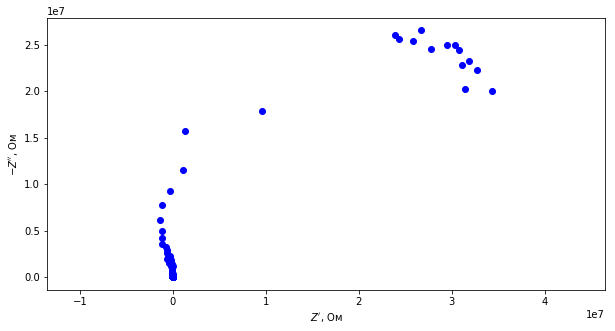

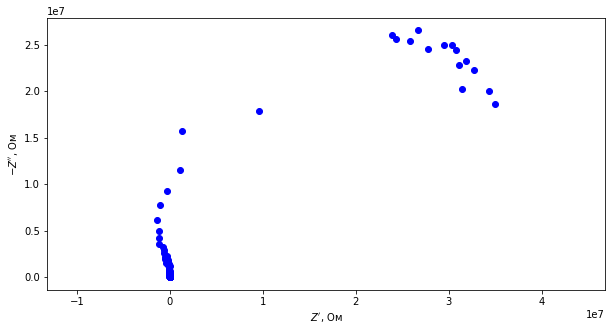

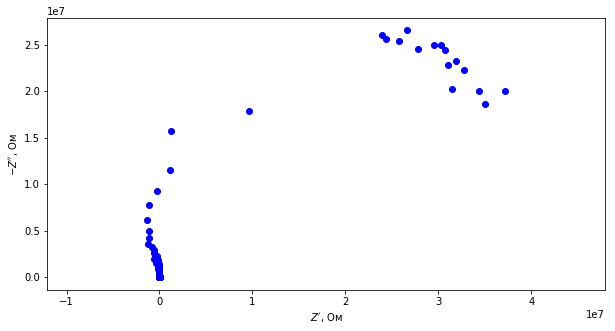

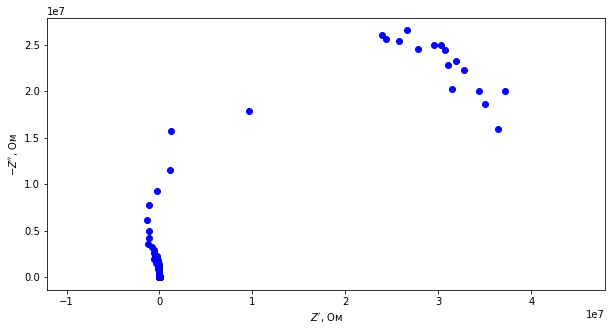

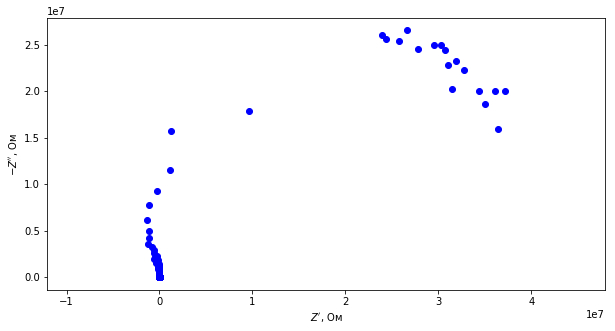

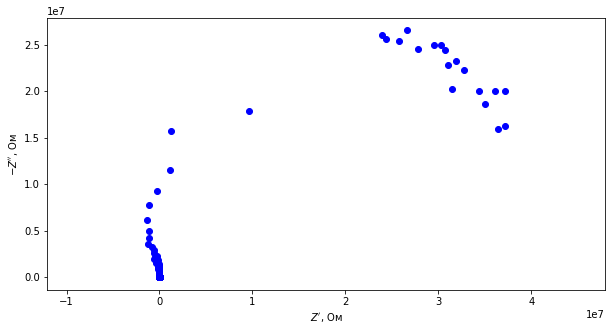

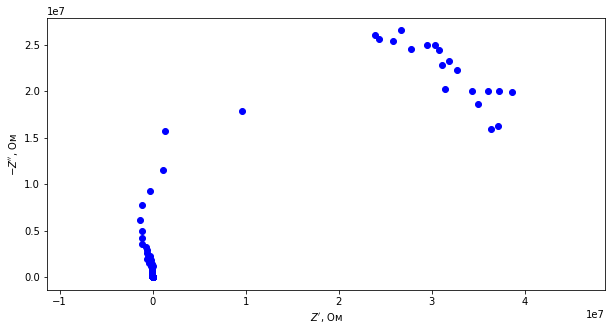

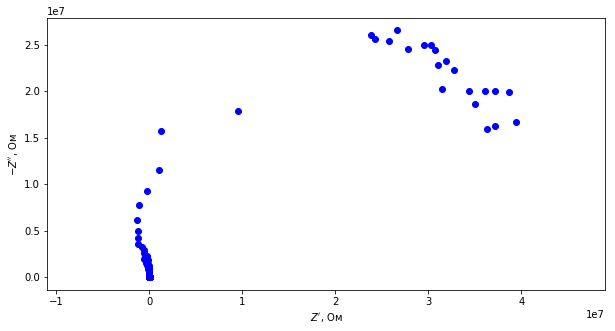

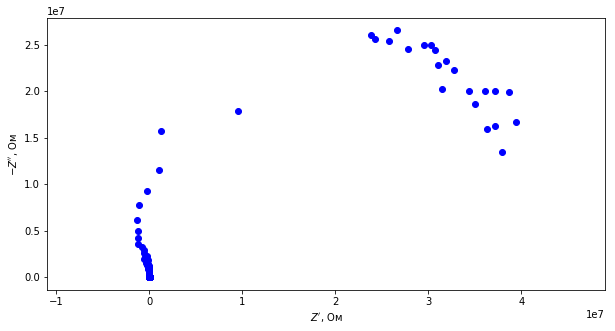

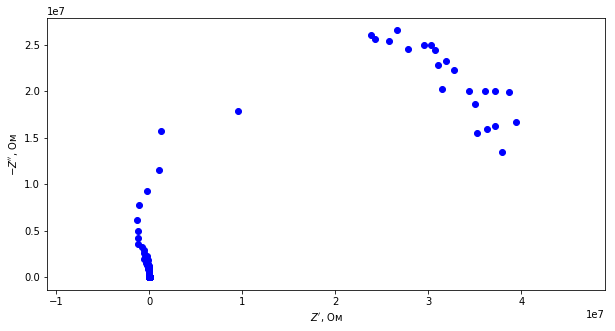

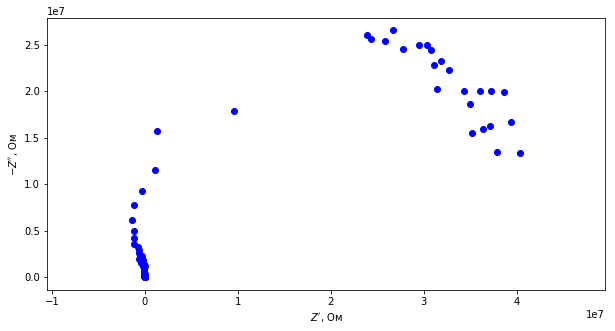

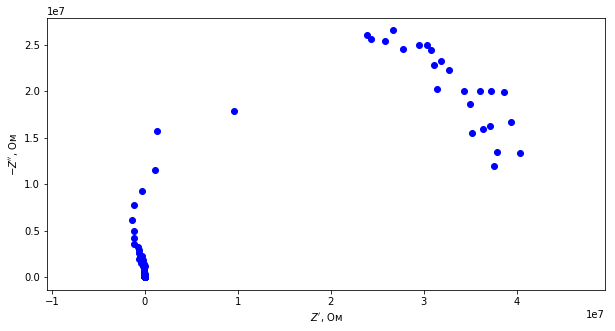

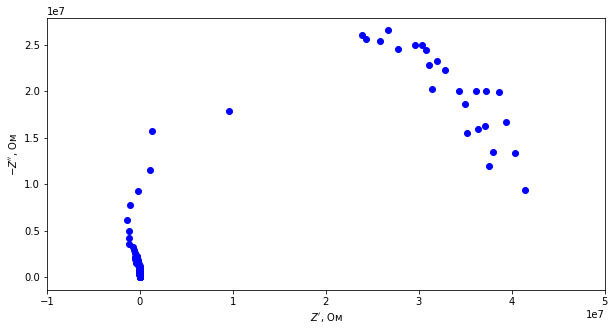

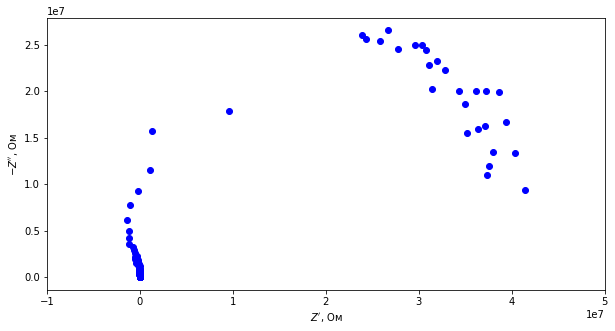

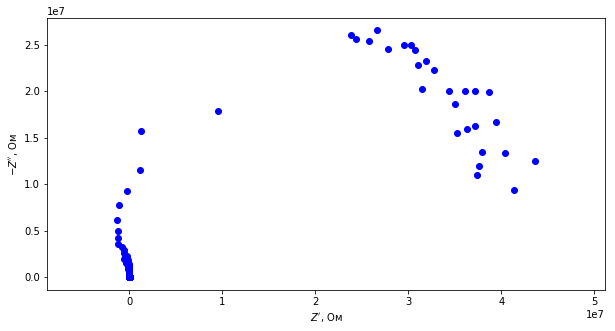

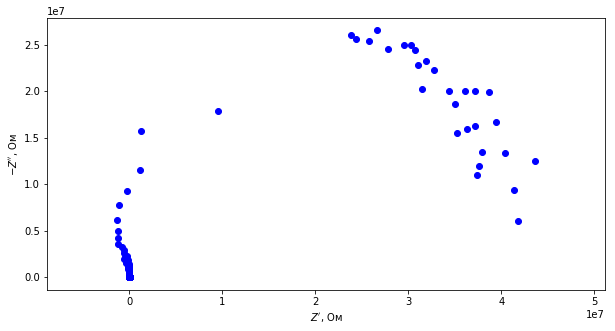

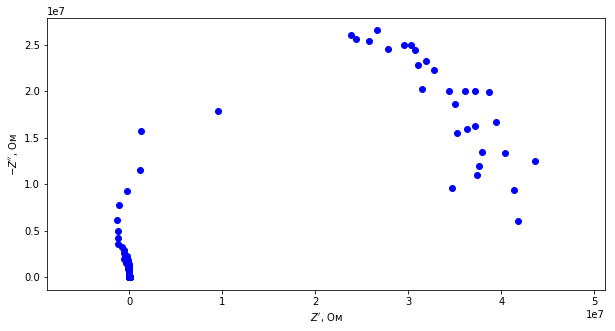

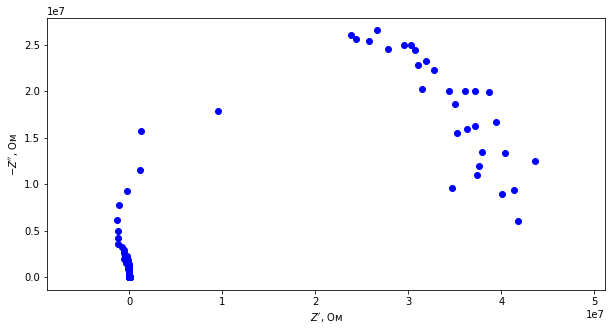

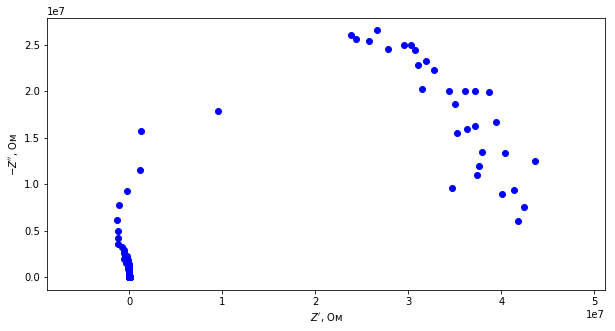

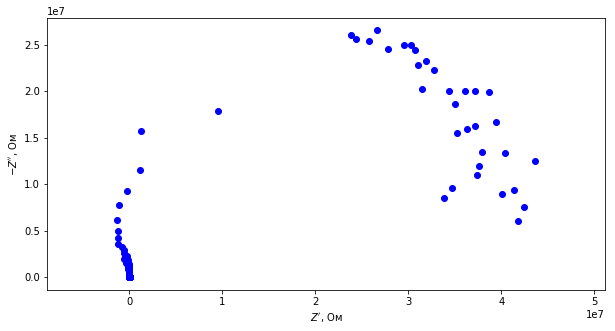

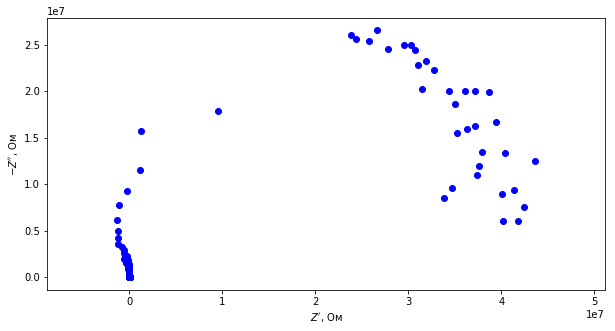

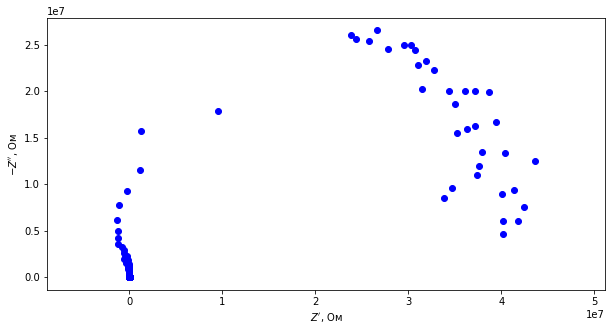

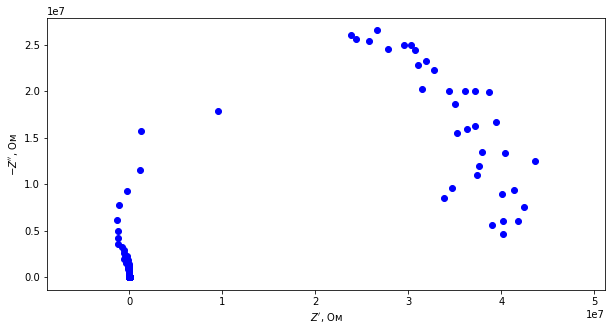

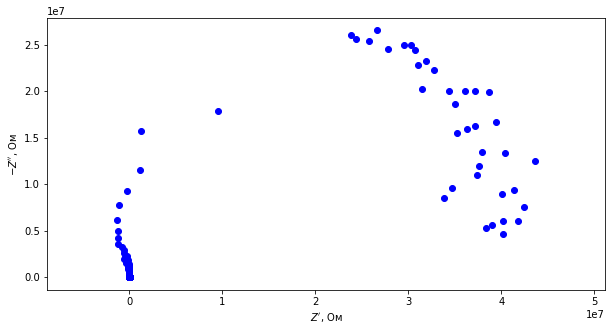

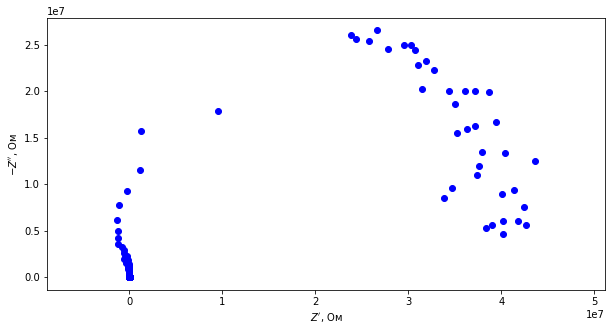

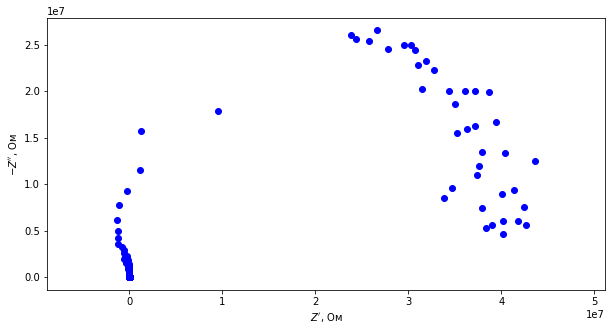

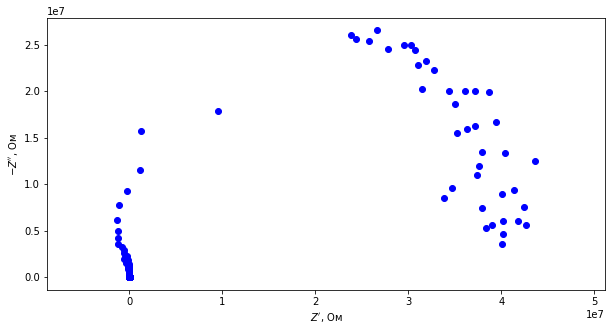

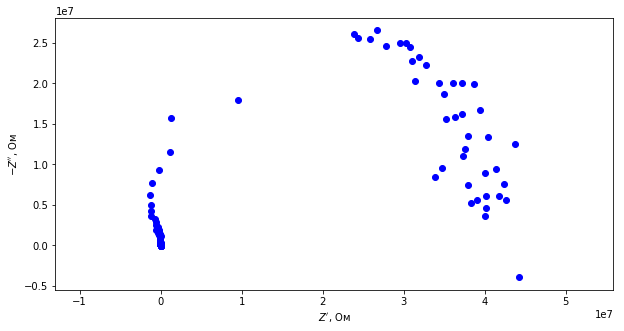

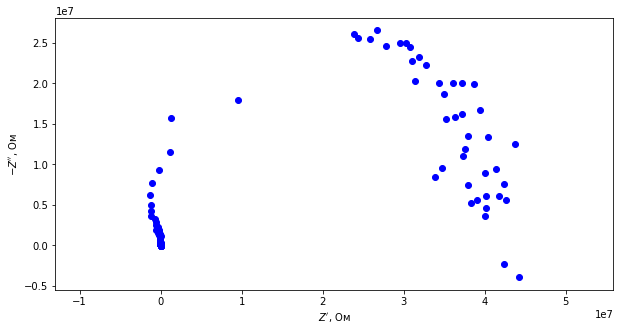

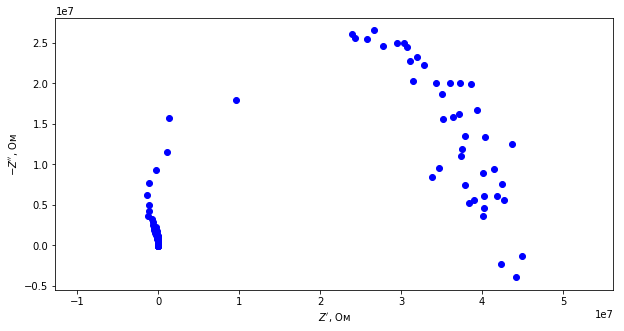

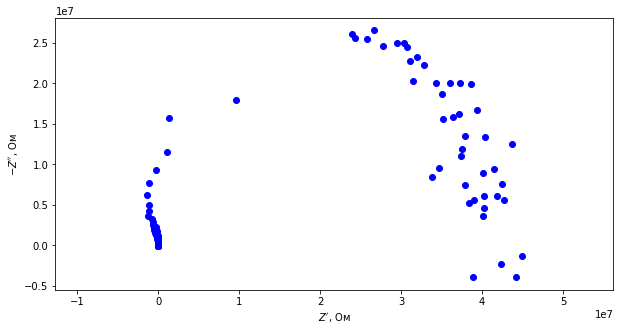

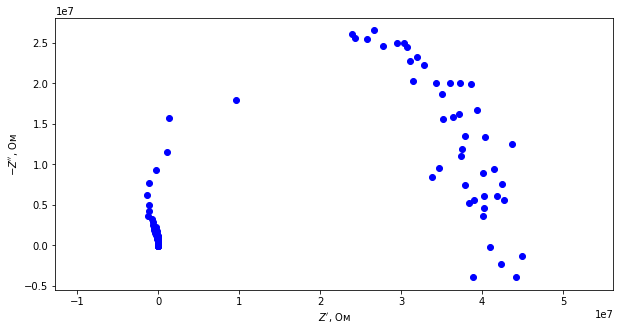

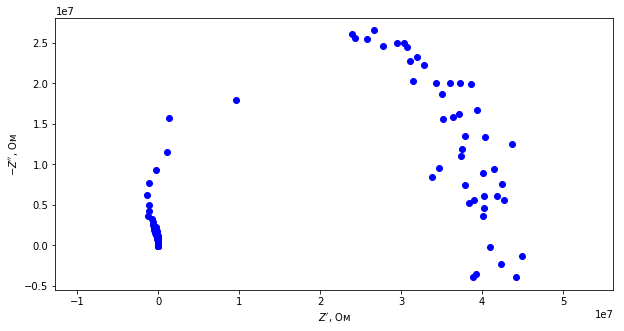

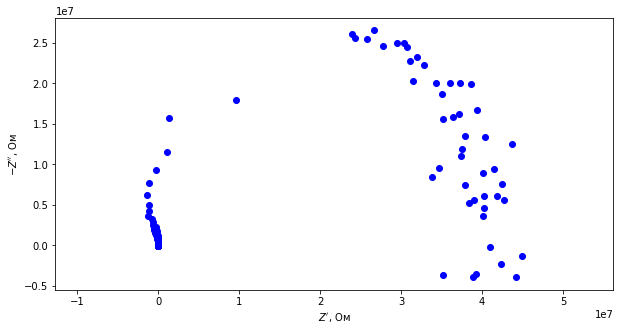

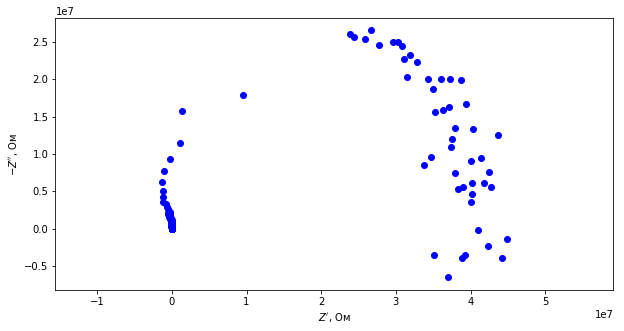

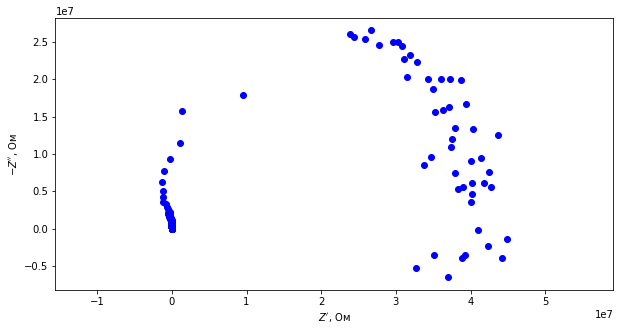

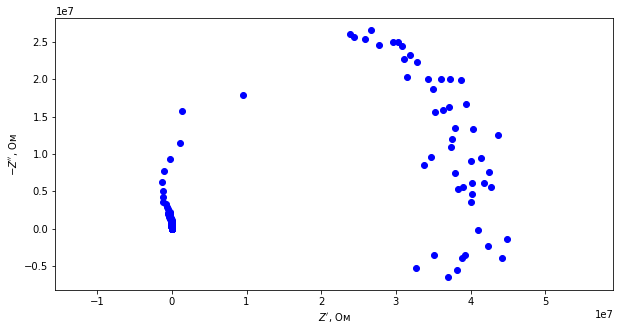

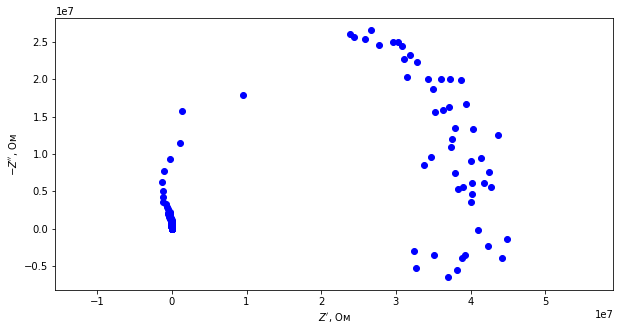

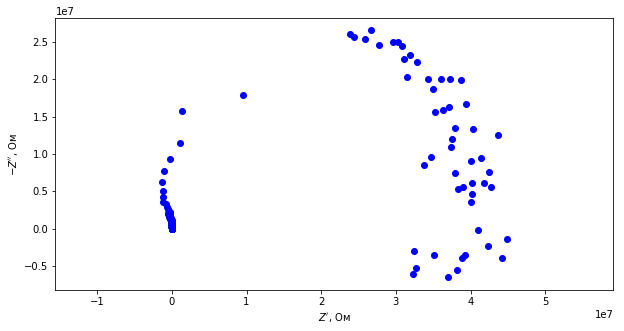

In [8]:
# ! Сохранять df в файл непрерывным образом!!!
# поймать ошибку - когда прибор  иногда перестает в какой-то момент работать - на частоте нескольких сотен кГц

%matplotlib inline
df = spectra_measurement(f_start = 10**6, f_end = 25, points=300, loops=20)
df.to_csv('tekstolit_TiO2-thick-1-1.csv')

In [ ]:
# в качестве конечной и стартовой частоты могут выбираться те, что находятся в списке
# 25, 50, 60, 100, 120, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000
import E720   # специально написанная библиотека для работы с E720 в python notebook

df = spectra_measurement(f_start = 5*10**5, f_end = 5*10**2, points=50, loops=10)

- [Минимизация (оптимизация) функции в scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)
- [Динамическое построение графиков в ipynb](https://stackoverflow.com/questions/34486642/what-is-the-currently-correct-way-to-dynamically-update-plots-in-jupyter-ipython/34486703)

[9.91342752e+03 1.00299269e+04 9.34329286e-10]


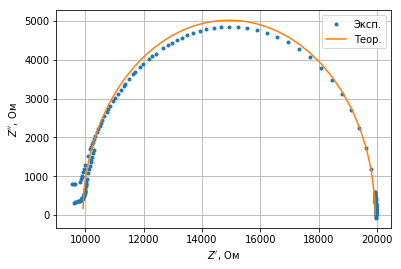

In [221]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

df = pd.read_csv('RRC3.csv', index_col=0)

omega = 2*np.pi*df['frequency'].values

def theory_curve(params):
    R1, R2, C = params
    Z = R1 + 1/(1/R2 + 1j*omega*C)
    return np.real(Z), np.imag(Z)

def f(params):
    theory_ReZ, theory_ImZ = theory_curve(params)
    Delta_Re = df['ReZ'].values-theory_ReZ
    Delta_Im = df['ImZ'].values-theory_ImZ
    return np.sqrt(np.sum(Delta_Re**2+Delta_Im**2))

initial_guess = [1e+4, 1e+4, 1e-6]

result = optimize.minimize(f, initial_guess, method = 'Nelder-Mead')
if result.success:
    fitted_params = result.x
    print(fitted_params)
    plt.plot(df['ReZ'], -df['ImZ'], '.', label='Эксп.')
    plt.plot(theory_curve(fitted_params)[0], -theory_curve(fitted_params)[1], label='Теор.')
    plt.xlabel("$Z'$, Ом")
    plt.ylabel("$Z''$, Ом")
    plt.grid()
    plt.legend()
else:
    raise ValueError(result.message)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

In [5]:
# удаление точек, не соответствующих - по алгоритму ближайшего соседа - через кластеризацию


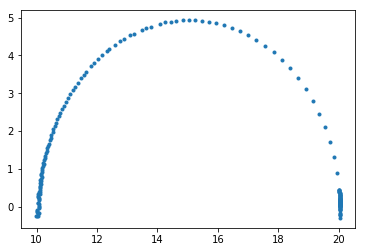

In [74]:
plt.plot(df['ReZ'], -df['ImZ'], '.')

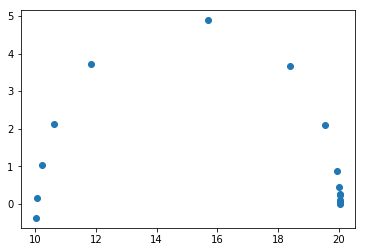

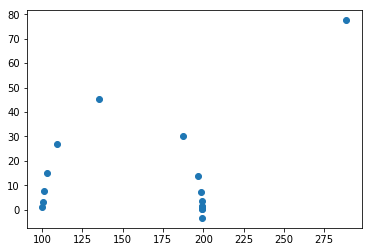

In [5]:
#! построение диаграмм Найквиста по результатам

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

for i in range(1, 3):
#     plt.xlabel('$Z\'$, Ом')
#     plt.ylabel('$Z\'\'$, Ом')
    ZZ = np.genfromtxt("ZZ{}.csv".format(i), defaultfmt='%.4e', delimiter=';')
    ZZ = ZZ[ZZ[:, 0].argsort()]
    plt.plot(ZZ[:, 1], -ZZ[:, 2], 'o')
    plt.show()

# Литература

1. Золотухин И. В. Нанокристаллические металлические материалы //Соросовский образовательный журнал. – 1998. – №. 1. – С. 103-106.
2. [Емельянова Ю. В. и др. Импедансная спектроскопия: теория и применение: учебное пособие. – 2017.](http://elar.urfu.ru/bitstream/10995/52395/1/978-5-7996-2067-7_2017.pdf)